In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# Principle of work

Principle of analysis is similar to the case of classic pools, check there for more info

### Setting simulation instances that contain all required info

In [2]:
# STO token pools
xaut_weth_sim = Simulation(experiment_id = 31, x_name = 'XAUt', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
uma_fei_sim = Simulation(experiment_id = 32, x_name = 'UMA', y_name = 'FEI', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
perl_weth_sim = Simulation(experiment_id = 33, x_name = 'PERL', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
bpt_weth_sim = Simulation(experiment_id = 34, x_name = 'BPT', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ustonks_usdc_sim = Simulation(experiment_id = 35, x_name = 'uSTONKS_APR_21', y_name = 'USDC', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

# Mirrored shares tokens
mamzn_ust_sim = Simulation(experiment_id = 41, x_name = 'mAMZN', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mbaba_ust_sim = Simulation(experiment_id = 42, x_name = 'mBABA', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
maapl_ust_sim = Simulation(experiment_id = 43, x_name = 'mAAPL', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

### Getting original swaps dataframes

In [3]:
xaut_weth_swaps_df = xaut_weth_sim.get_original_swaps_df()
uma_fei_swaps_df = uma_fei_sim.get_original_swaps_df()
perl_weth_swaps_df = perl_weth_sim.get_original_swaps_df()
bpt_weth_swaps_df = bpt_weth_sim.get_original_swaps_df()
ustonks_usdc_swaps_df = ustonks_usdc_sim.get_original_swaps_df()

mamzn_ust_swaps_df = mamzn_ust_sim.get_original_swaps_df()
mbaba_ust_swaps_df = mbaba_ust_sim.get_original_swaps_df()
maapl_ust_swaps_df = maapl_ust_sim.get_original_swaps_df()

### Setting concatenation between original swaps dataframe and gas-related info

In [4]:
sto_pools_list = [xaut_weth_swaps_df, uma_fei_swaps_df, perl_weth_swaps_df,
                  bpt_weth_swaps_df, ustonks_usdc_swaps_df, mamzn_ust_swaps_df,
                  mbaba_ust_swaps_df, maapl_ust_swaps_df]

sto_pools_swaps_df = pd.concat(sto_pools_list)
with open('sto_pools_mevs', 'rb') as f: mevs_transactions_list = pickle.load(f)

mevs_df = pd.read_pickle('sto_pools_mevs_with_gas_df.pkl')
mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee
0,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124,3,"103,352","1,841.40",0.000000001
1,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124,0,"126,727","1,841.40",0.000000001
2,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368,2,"76,866","2,706.52",0
3,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368,0,"109,491","2,706.52",0
4,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859,3,"110,550","2,166.61",0
...,...,...,...,...,...,...
127,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489
128,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437
129,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437
130,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301


In [5]:
mevs_df = pd.merge(mevs_df, sto_pools_swaps_df, on='txd', how='left')

In [6]:
mevs_df['block'] = pd.to_numeric(mevs_df['block'])
mevs_df['block_position'] = pd.to_numeric(mevs_df['block_position'])
mevs_df['gas_usage_by_tx'] = pd.to_numeric(mevs_df['gas_usage_by_tx'].str.replace(',', ''))
mevs_df['ether_price'] = pd.to_numeric(mevs_df['ether_price'].str.replace(',', ''))
mevs_df['tx_fee'] = pd.to_numeric(mevs_df['tx_fee'].str.replace('wei', ''))
mevs_df['gas_price'] = pd.to_numeric(mevs_df['gas_price']) / 1000000000000000000
mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              132 non-null    object        
 1   block            132 non-null    int64         
 2   block_position   132 non-null    int64         
 3   gas_usage_by_tx  132 non-null    int64         
 4   ether_price      132 non-null    float64       
 5   tx_fee           132 non-null    float64       
 6   token_in         132 non-null    object        
 7   token_out        132 non-null    object        
 8   amount_in        132 non-null    float64       
 9   amount_out       132 non-null    float64       
 10  amount_usd       132 non-null    float64       
 11  timestamp        132 non-null    datetime64[ns]
 12  sender           132 non-null    object        
 13  to               132 non-null    object        
 14  gas_price        132 non-null    float64  

### Correlation between features

Correlation between block number and Ether price is extremely high. There is a medium level correlation between gas price and ```amount_in``` value of transaction. ```tx_fee``` has a medium level correlation with ```amount_in``` and ```ether_price```. Those correlation are stronger compared to the case of classic tokens.

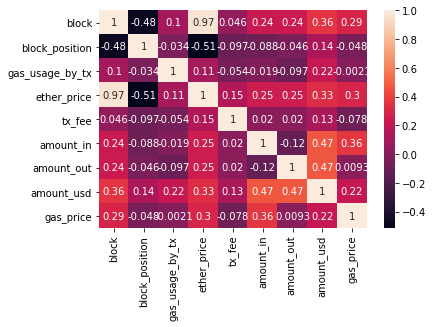

In [7]:
sns.heatmap(mevs_df.corr(), annot=True)
plt.show()

### Setting scatters of features

There is a problem with dataset of ```tx_fee``` values equal to 1 (possible source error) and therefore records with value around 1 were ignored.

There is almost no connection present between tx fee and gas usage. Can be seen that most of the records are concentrated around small values with some extreme outliers. Therefore it was decided to check connection with ether price (even considering that correlation presented in the heatmap is small).

Connection is weak and there is no observable pattern between Ether price and value with fee of the transaction.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


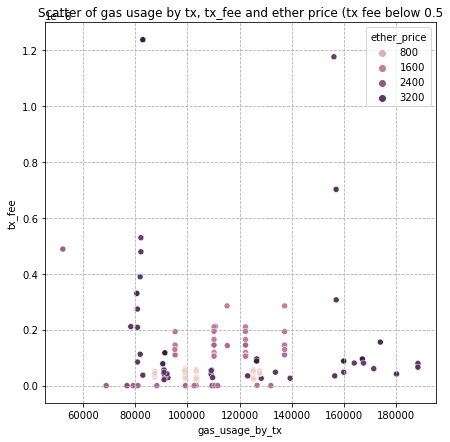

In [8]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


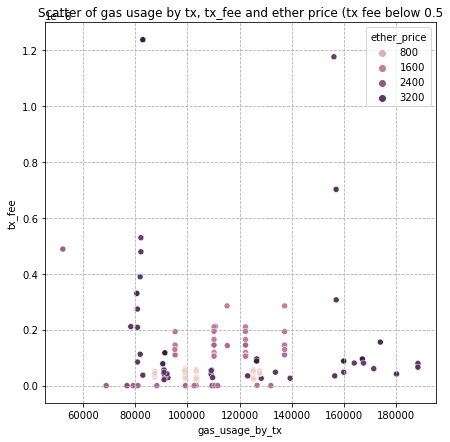

In [9]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5')
plt.show()

In [10]:
mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
0,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124,3,103352,1841.40,1.000000e-09,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,1.000000e-09,200000
1,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124,0,126727,1841.40,1.000000e-09,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,1.000000e-09,200000
2,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368,2,76866,2706.52,0.000000e+00,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0.000000e+00,2000000
3,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368,0,109491,2706.52,0.000000e+00,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0.000000e+00,2000000
4,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859,3,110550,2166.61,0.000000e+00,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0.000000e+00,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,123126,3226.59,3.476130e-08,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,3.476130e-08,2000000
128,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,133773,3172.57,4.793013e-08,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,4.793013e-08,400000
129,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,159961,3172.57,4.793013e-08,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,4.793013e-08,400000
130,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,180198,3435.76,4.160346e-08,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,4.160346e-08,270297


Most of the records are placed in the lowest left section, meaning that most of transactions are keeping a small level of gas consumption, but the most interesting moment is that all those low-value cases conform hue are having smallest ```gas_price``` values, meaning that most of the attacks are performed during low gas price. Therefore, low gas price will not cause higher transaction values (there is no strong correlation) but causes bigger MEV activity. This is similar to the case of reviewed classic tokens.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


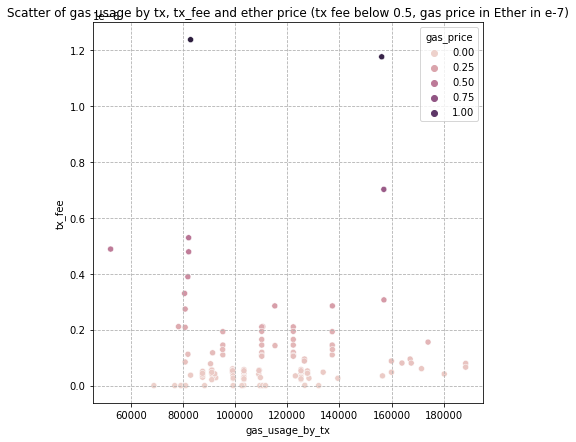

In [11]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


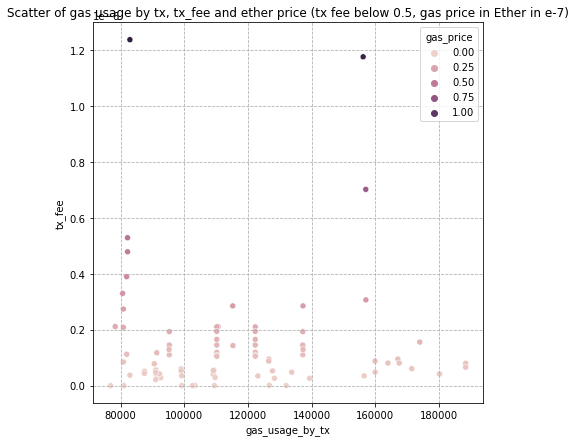

In [12]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

Out of 132 MEV transactions there are 2 transactions with incorrect ```tx_fee``` value. In case of plotting transaction with this outlier value can be seen that distribution is almost flatlined one.

In [13]:
print(len(mevs_df))
print(len(mevs_df[mevs_df['tx_fee'] > 0.5]))
print(len(mevs_df[mevs_df['amount_usd'] < 300]))

132
2
42


There is no observable connection between capitalization of transactions, their fees and Ether price, but can be seen less compared to the case of classic tokens shift to the lower left part of scatter, meaning that in current case transaction fee had small impact on performed attacks.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


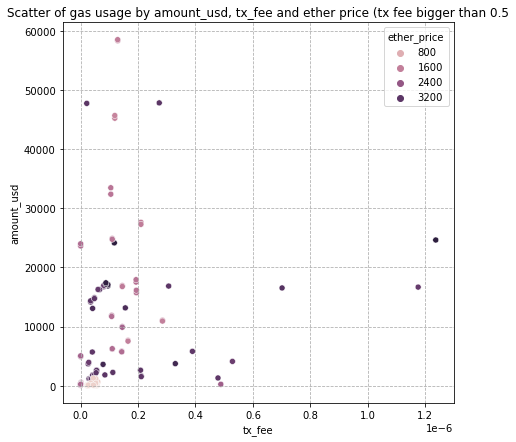

In [14]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

Once more, all records are more concentrated on lower values of the gas price, meaning that lower gas price stimulates MEV attacks.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


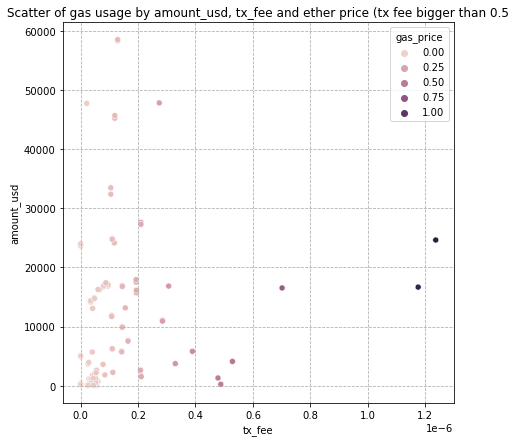

In [15]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


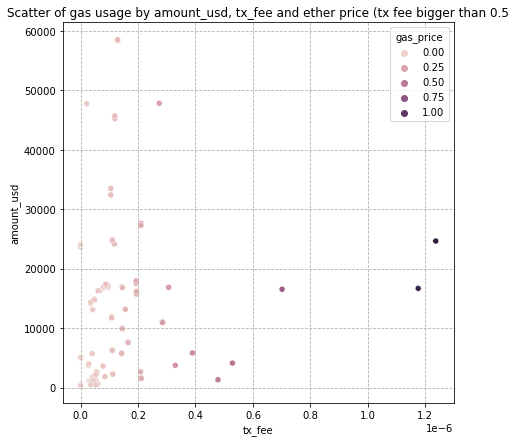

In [16]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['amount_usd'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

There are only some unique attackers that are ready to pay higher transaction fees. Those unique cases are going out of the distribution for most of the records and can be seen that some addresses are representing a big number of records. It means that most of the records belong to several addresses. To ensure that, further countplot will be done

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


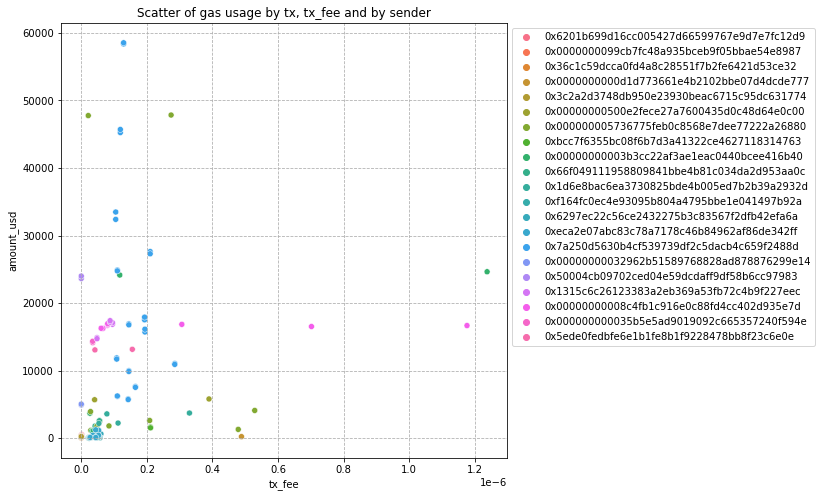

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

Only in unique cases attackers are willing to perform transaction with high gas usage and high transaction fees, demonstrating desire for most of the attackers to minimize their losses

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


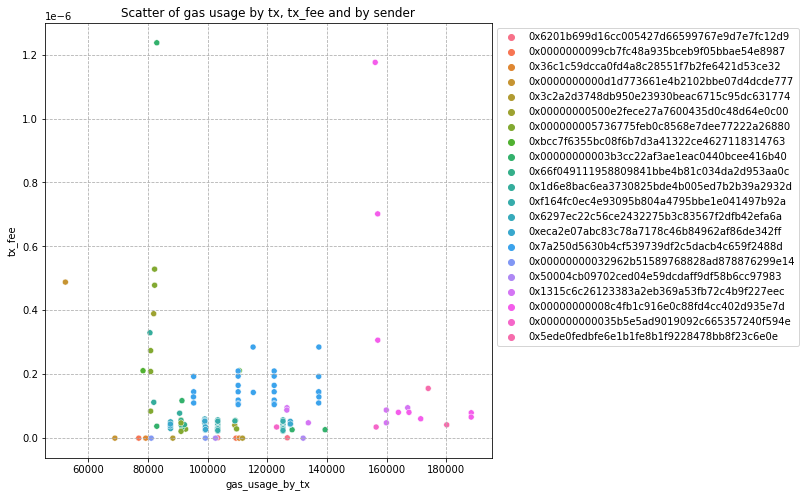

In [18]:
plt.figure(figsize=(8, 8))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

In [19]:
mevs_df.sort_values(by=['block'], inplace=True)

In [20]:
mevs_df[mevs_df['tx_fee'] == 1]

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
89,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,12359575,0,114568,3432.21,1.0,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,1.000000e-18,500000
88,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,12359575,2,89876,3432.21,1.0,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,1.000000e-18,6000000


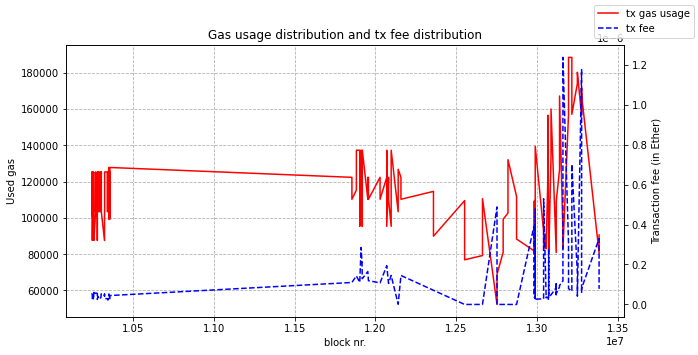

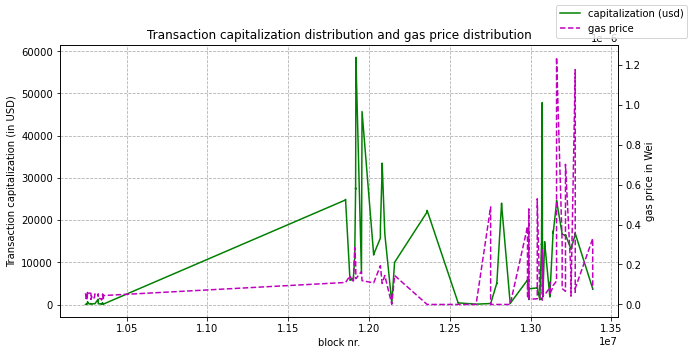

In [21]:
# gas usage and tx fee
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()

ax.plot(mevs_df['block'], mevs_df['gas_usage_by_tx'], color='r', label='tx gas usage')
ax.set_title('Gas usage distribution and tx fee distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')

ax2.plot(mevs_df[mevs_df['tx_fee'] != 1]['block'],
         mevs_df[mevs_df['tx_fee'] != 1]['tx_fee'], color='b', linestyle='--', label='tx fee')
ax2.set_ylabel('Transaction fee (in Ether)')

fig.legend()
plt.show()

# capitalization and gas price
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()

ax.plot(mevs_df['block'], mevs_df['amount_usd'], color='g', label='capitalization (usd)')
ax.set_title('Transaction capitalization distribution and gas price distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Transaction capitalization (in USD)')
ax.grid(True, linestyle='--')

ax2.plot(mevs_df['block'], mevs_df['gas_price'], color='m', linestyle='--', label='gas price')
ax2.set_ylabel('gas price in Wei')

fig.legend()
plt.show()

In most of the cases, MEV transactions are the first and the third ones (which corresponds to the basic attack pattern), but there are some specific cases of attacks happening little later (till position 9). All values above 10-th position are more likely to be outliers.

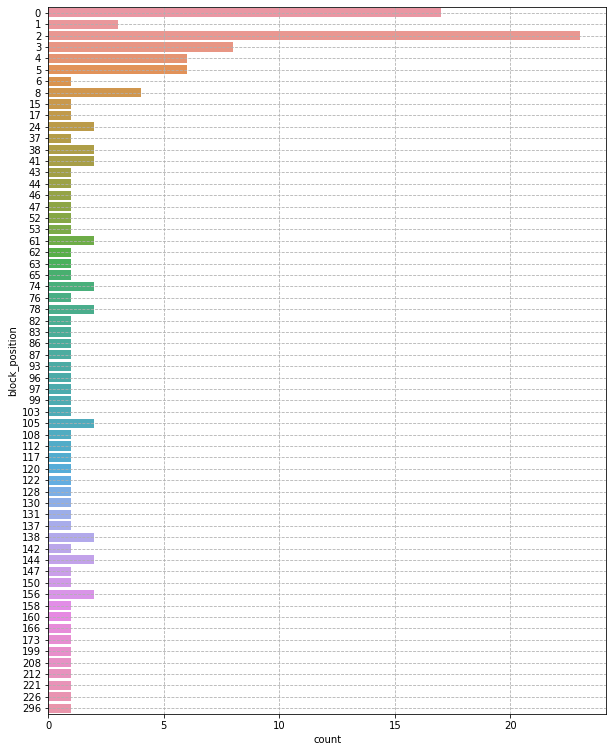

In [22]:
plt.figure(figsize=(10, 13))
sns.countplot(y='block_position', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

There are transactions with extremely small capitalizations, reducing their likelihood of being MEV attacks and it is possible that in current case additional MEV values check is required to be performed.

In [23]:
print(fr'max capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].max()}')
print(fr'min capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].min()}')
print(fr'mean capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].mean()}')
print(fr'median capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].median()}')

max capitalization registered after 9-th position in the block = 58535.88556759252
min capitalization registered after 9-th position in the block = 21.150433089502076
mean capitalization registered after 9-th position in the block = 9243.476250151884
median capitalization registered after 9-th position in the block = 348.6681455300943


There are several addresses with around 10-13 MEV attacks performed on the STO tokens pools. There is a small amount of addresses and can be seen that compared to the previous classic tokens case interest from attackers is lower.

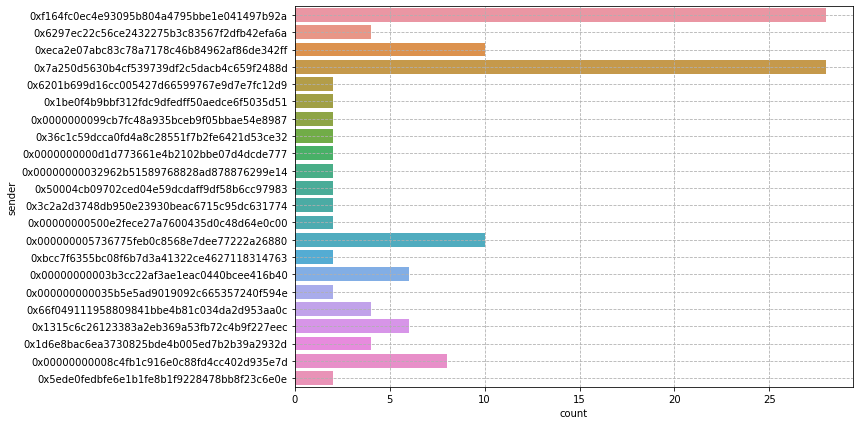

In [24]:
fig = plt.figure(figsize=(10, 7))
sns.countplot(y='sender', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

# Separate analysis of all pools

In [25]:
weth_usdc_sim = Simulation(experiment_id = 2, x_name = 'WETH', y_name = 'USDC', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_",
                           x_index='1', y_index='0')
weth_price_df = weth_usdc_sim.get_daily_token_price(True, 'WETH')
weth_price_df['date'] = weth_price_df['date'].dt.strftime("%Y-%m-%d")

In [26]:
sto_pools_mevs_df = pd.read_pickle('sto_pools_mevs_with_gas_df.pkl')
sto_pools_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee
0,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124,3,"103,352","1,841.40",0.000000001
1,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124,0,"126,727","1,841.40",0.000000001
2,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368,2,"76,866","2,706.52",0
3,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368,0,"109,491","2,706.52",0
4,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859,3,"110,550","2,166.61",0
...,...,...,...,...,...,...
127,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489
128,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437
129,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437
130,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301


In [27]:
sto_pools_mevs_df['block'] = pd.to_numeric(sto_pools_mevs_df['block'])
sto_pools_mevs_df['block_position'] = pd.to_numeric(sto_pools_mevs_df['block_position'])
sto_pools_mevs_df['gas_usage_by_tx'] = pd.to_numeric(sto_pools_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
sto_pools_mevs_df['ether_price'] = sto_pools_mevs_df['ether_price'].str.replace('$', '')
sto_pools_mevs_df['ether_price'] = pd.to_numeric(sto_pools_mevs_df['ether_price'].str.replace(',', ''))
sto_pools_mevs_df['tx_fee'] = pd.to_numeric(sto_pools_mevs_df['tx_fee'].str.replace('wei', ''))
sto_pools_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   txd              132 non-null    object 
 1   block            132 non-null    int64  
 2   block_position   132 non-null    int64  
 3   gas_usage_by_tx  132 non-null    int64  
 4   ether_price      132 non-null    float64
 5   tx_fee           132 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 6.3+ KB


<ipython-input-27-56a6c572b202>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sto_pools_mevs_df['ether_price'] = sto_pools_mevs_df['ether_price'].str.replace('$', '')


In [28]:
xaut_weth_swaps_df = xaut_weth_sim.get_original_swaps_df()
uma_fei_swaps_df = uma_fei_sim.get_original_swaps_df()
perl_weth_swaps_df = perl_weth_sim.get_original_swaps_df()
bpt_weth_swaps_df = bpt_weth_sim.get_original_swaps_df()
ustonks_usdc_swaps_df = ustonks_usdc_sim.get_original_swaps_df()

mamzn_ust_swaps_df = mamzn_ust_sim.get_original_swaps_df()
mbaba_ust_swaps_df = mbaba_ust_sim.get_original_swaps_df()
maapl_ust_swaps_df = maapl_ust_sim.get_original_swaps_df()

## XAUt/WETH

Contains no attacks on the pool, therefore no MEV analysis required

In [29]:
xaut_weth_filtered_swaps_df, xaut_weth_mevs_df = xaut_weth_sim.extract_filtered_and_mevs_dfs()
xaut_weth_mevs_df

initial len = 31, filtered len = 31
txds = 0
out values = 0


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used


## UMA/FEI

There are some MEVs present during 5-7 January 2022, but considering that information was downloaded for older version of detected MEVs for this pool, this part will be ignored

In [30]:
uma_fei_filtered_swaps_df, uma_fei_mevs_df = uma_fei_sim.extract_filtered_and_mevs_dfs()
uma_fei_mevs_df

initial len = 1405, filtered len = 1387
txds = 18
out values = 9


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
70,FEI,UMA,38888.161748,2876.894389,3.873736e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,103937172786,2000000
71,UMA,FEI,2876.894389,39182.321402,3.888450e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,205007997099,266434
245,FEI,UMA,37592.699912,3610.318913,3.743058e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,53209292896,2000000
246,UMA,FEI,3610.318913,37808.608983,3.753851e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,154360551061,266315
567,FEI,UMA,34626.519619,3261.773446,3.426569e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,98266011875,2000000
568,UMA,FEI,3261.773446,35208.561980,3.455622e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x8fda711e4029a9c5b3470e425a1a7ef2ec66edcf5544...,560838208474,266546
608,UMA,FEI,6200.876731,64684.371257,6.369420e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x3a8c8494454dd28217b0c6cef91bf2b66f7f0ce347aa...,172546206640,266497
609,FEI,UMA,64461.330652,6200.876731,6.358290e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa10181622b54f7a1a9af86fe823208acaa373bc7a25e...,40289435267,2000000
626,UMA,FEI,5931.385586,57924.458652,5.752230e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x77bcdd0bd07ebcc401b7acae11d66795f85217c41374...,1020914273737,266504
628,FEI,UMA,57013.248554,5931.385586,5.706675e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xfd854aa3b9ba9212ea8a7c534ff8bae4ee0d59b07725...,84604829679,2000000


## PERL/WETH

In [31]:
perl_weth_filtered_swaps_df, perl_weth_mevs_df = perl_weth_sim.extract_filtered_and_mevs_dfs()
perl_weth_mevs_df

initial len = 1908, filtered len = 1870
txds = 38
out values = 19


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
187,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,200000
188,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,200000
295,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,2000000
297,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,2000000
394,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,1000000
396,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,1000000
468,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,129534
469,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,500000
493,PERL,WETH,4205.490904,0.132764,261.678435,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x5ae6d4b162bd3364693dc6a8eda6e189a337f25eb016...,0,500000
494,WETH,PERL,0.127062,4205.490904,250.440296,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x8bbfea5d70e2dab861c4a1aedf2e44fbe62738891163...,0,500000


In [32]:
perl_weth_mevs_df = perl_weth_sim.calculate_attack_profit(perl_weth_mevs_df)
perl_weth_mevs_df = perl_weth_sim.calculate_attack_profit_by_token(perl_weth_mevs_df)

In [33]:
perl_price_df = perl_weth_sim.get_daily_token_price(first_to_second=True, token_name='PERL')
perl_price_df['date'] = perl_price_df['date'].dt.strftime("%Y-%m-%d")
perl_price_df

,date,PERL_price
0,2020-08-20,0.000519
1,2020-08-21,0.000146
2,2020-09-13,0.000184
3,2020-09-26,0.000065
4,2020-09-29,0.000051
...,...,...
307,2022-02-02,0.000018
308,2022-02-03,0.000018
309,2022-02-04,0.000019
310,2022-02-06,0.000018


In [34]:
perl_weth_mevs_df['date'] = perl_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
perl_weth_mevs_df = pd.merge(perl_weth_mevs_df, perl_price_df, on='date', how='left')
perl_weth_mevs_df = pd.merge(perl_weth_mevs_df, weth_price_df, on='date', how='left')
perl_weth_mevs_df = pd.merge(perl_weth_mevs_df, sto_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [35]:
perl_weth_mevs_df['bruto_perl_to_usdc_profit'] = (perl_weth_mevs_df['PERL_profit'] * perl_weth_mevs_df['PERL_price'] *
                                                  perl_weth_mevs_df['WETH_price'])
perl_weth_mevs_df['bruto_total_profit'] = perl_weth_mevs_df['bruto_perl_to_usdc_profit'] + (perl_weth_mevs_df['WETH_profit'] *
                                                                                            perl_weth_mevs_df['WETH_price'])
perl_weth_mevs_df.loc[perl_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = perl_weth_mevs_df['tx_fee'].median()
perl_weth_mevs_df.loc[perl_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = perl_weth_mevs_df['tx_fee'].median()
perl_weth_mevs_df['gas_costs_usd'] = (perl_weth_mevs_df['tx_fee'] * perl_weth_mevs_df['WETH_price'] *
                                      perl_weth_mevs_df['gas_usage_by_tx'])
perl_weth_mevs_df['netto_profit'] = perl_weth_mevs_df['bruto_total_profit'] - perl_weth_mevs_df['gas_costs_usd']
perl_weth_mevs_df.dropna(inplace=True)
perl_weth_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,...,1835.198246,12141124,3,103352,1841.40,1.000000e-09,0.000000,128.531868,0.189671,128.342197
1,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,...,1835.198246,12141124,0,126727,1841.40,1.000000e-09,0.000000,128.531868,0.232569,128.299299
2,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,...,2711.241453,12552368,2,76866,2706.52,4.490191e-08,0.000000,66.618935,9.357660,57.261275
3,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,...,2711.241453,12552368,0,109491,2706.52,4.490191e-08,0.000000,66.618935,13.329424,53.289510
4,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,2172.402962,12662859,3,110550,2166.61,4.490191e-08,0.000000,4.358010,10.783604,-6.425594
5,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,2172.402962,12662859,5,79211,2166.61,4.490191e-08,0.000000,4.358010,7.726640,-3.368630
6,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,...,2225.772434,12752772,2,52267,2227.18,4.882574e-07,0.000000,60.803993,56.801157,4.002836
7,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,...,2225.772434,12752772,0,68874,2227.18,4.490191e-08,0.000000,60.803993,6.883366,53.920627
8,PERL,WETH,4205.490904,0.132764,261.678435,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x5ae6d4b162bd3364693dc6a8eda6e189a337f25eb016...,0,...,2021.690247,12873879,4,88306,2024.74,4.490191e-08,0.000000,11.527154,8.016220,3.510935
9,WETH,PERL,0.127062,4205.490904,250.440296,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x8bbfea5d70e2dab861c4a1aedf2e44fbe62738891163...,0,...,2021.690247,12873879,2,111674,2024.74,4.490191e-08,0.000000,11.527154,10.137514,1.389640


In [36]:
print(len(perl_weth_mevs_df))
perl_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(perl_weth_mevs_df))
perl_weth_mevs_df

38
38


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,...,1835.198246,12141124,3,103352,1841.40,1.000000e-09,0.000000,128.531868,0.189671,128.342197
1,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,...,1835.198246,12141124,0,126727,1841.40,1.000000e-09,0.000000,128.531868,0.232569,128.299299
2,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,...,2711.241453,12552368,2,76866,2706.52,4.490191e-08,0.000000,66.618935,9.357660,57.261275
3,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,...,2711.241453,12552368,0,109491,2706.52,4.490191e-08,0.000000,66.618935,13.329424,53.289510
4,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,2172.402962,12662859,3,110550,2166.61,4.490191e-08,0.000000,4.358010,10.783604,-6.425594
5,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,2172.402962,12662859,5,79211,2166.61,4.490191e-08,0.000000,4.358010,7.726640,-3.368630
6,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,...,2225.772434,12752772,2,52267,2227.18,4.882574e-07,0.000000,60.803993,56.801157,4.002836
7,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,...,2225.772434,12752772,0,68874,2227.18,4.490191e-08,0.000000,60.803993,6.883366,53.920627
8,PERL,WETH,4205.490904,0.132764,261.678435,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x5ae6d4b162bd3364693dc6a8eda6e189a337f25eb016...,0,...,2021.690247,12873879,4,88306,2024.74,4.490191e-08,0.000000,11.527154,8.016220,3.510935
9,WETH,PERL,0.127062,4205.490904,250.440296,2021-07-22 03:41:01,0x3c2a2d3748db950e23930beac6715c95dc631774,0x3c2a2d3748db950e23930beac6715c95dc631774,0x8bbfea5d70e2dab861c4a1aedf2e44fbe62738891163...,0,...,2021.690247,12873879,2,111674,2024.74,4.490191e-08,0.000000,11.527154,10.137514,1.389640


### Bigger sandwiches and profits

In [37]:
perl_weth_count_df = perl_weth_mevs_df.value_counts(subset=['timestamp'])
perl_weth_count_df[perl_weth_count_df.values > 2]

Series([], dtype: int64)

In [38]:
grouped_perl_weth_profits_df = perl_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_perl_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_perl_weth_profits_df['block'] = grouped_perl_weth_profits_df['block'] / 2
grouped_perl_weth_profits_df['bruto_total_profit'] = grouped_perl_weth_profits_df['bruto_total_profit']/2
grouped_perl_weth_profits_df['netto_profit'] = (grouped_perl_weth_profits_df['bruto_total_profit'] -
                                               grouped_perl_weth_profits_df['gas_costs_usd'])
grouped_perl_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_perl_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_perl_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_perl_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_perl_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(perl_weth_mevs_df[perl_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(perl_weth_mevs_df[perl_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 488.91851953673284
min brutto profit 4.358009665834503
max netto profit 128.10962779987733
min netto profit -14.15223361678577
zero bruto profit transactions = 0
transactions with losses = 2


In [39]:
print(fr"sum of paid gas = {sum(perl_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(perl_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(perl_weth_mevs_df['bruto_total_profit'] / 2) - sum(perl_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 1534.9324531504205
sum of brutto profits = 1882.7155786156893
sum of netto profits = 347.78312546526877


### Brutto profit to Uniswap capitalization coefficient

In [40]:
print("brutto attacks profits (" + str(sum(perl_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to PERL/WETH Uniswap capitalization (" + str(perl_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(perl_weth_mevs_df['bruto_total_profit'] / 2) / perl_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (1882.7155786156893) to PERL/WETH Uniswap capitalization (5650155.015855588) coef is equal to 0.0003332148539876113


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [41]:
perl_weth_swaps_df = perl_weth_sim.calculate_attack_profit_by_token(perl_weth_swaps_df)
perl_weth_swaps_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,PERL_profit,WETH_profit
0,WETH,PERL,1.000000,408.979034,202.663354,2020-08-20 07:31:20,0x21e479e62603a3ea0b6dc687cb86b9938d39a3dd,0x21e479e62603a3ea0b6dc687cb86b9938d39a3dd,0x259920fbd70f1fb6081890bc61f3d04bb65f7fdb71be...,119999999999,3023121,408.979034,1.000000,0.0,0.00000
1,WETH,PERL,0.330000,9.444516,66.865797,2020-08-20 07:31:33,0x90b98c3db94f6d2a088a3d7e4c86e15a39f8ee0d,0x90b98c3db94f6d2a088a3d7e4c86e15a39f8ee0d,0xa2579b1d7d65a6196165219ce988979ed0c07a0ed4cb...,134999999999,400001,9.444516,0.330000,0.0,0.00000
2,WETH,PERL,0.100000,2.058032,20.248495,2020-08-20 07:34:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x21f1d0daa58f49a0a03855966e79026d2001d00e,0x394e02caf2236dabe102ee16f563e438cc6dc4fa8c44...,72876271487,166039,2.058032,0.100000,0.0,0.00000
3,WETH,PERL,0.111533,2.000000,22.576193,2020-08-20 07:37:55,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc26da32095985cd03201103bf400fc8058621240,0xa7b8b130b5441fbf6aa77fe37c893ec9d9c76ae375e6...,120000000000,174472,2.000000,0.111533,0.0,0.00000
4,PERL,WETH,2.058032,0.113905,23.020060,2020-08-20 07:41:29,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xb69d1b70c6d0059ff0ec29acf0dc39756dd5c38c90f2...,91905960628,169460,2.058032,0.113905,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,PERL,WETH,4551.729640,0.084367,255.234678,2022-02-06 03:49:44,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0x0015969af516832ef4e439f91743dba9e6684dfcd00f...,66067219866,617219,4551.729640,0.084367,0.0,0.00000
1904,PERL,WETH,433466.142099,9.147686,27537.117182,2022-02-06 10:00:45,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x0bc17f71530f4849248a692cdd5c75352f777a986f17...,1308444436499,290057,433466.142099,9.147686,0.0,0.04838
1905,WETH,PERL,9.196066,433466.142099,27682.754051,2022-02-06 10:00:45,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xd2d3d2e0fd2a3b80c3bc71d6491cfd02c65b6f0fc0bc...,44807669407,302795,433466.142099,9.196066,0.0,0.04838
1906,PERL,WETH,27878.636012,0.512439,1542.579270,2022-02-06 10:01:03,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0x47da24a98f5ddf43e611fcd23ad951a71478aa9f3fc7...,47238407293,281986,27878.636012,0.512439,0.0,0.00000


In [42]:
perl_price_df = perl_weth_sim.get_daily_token_price(first_to_second=True, token_name='PERL')
perl_price_df['date'] = perl_price_df['date'].dt.strftime("%Y-%m-%d")
perl_price_df

,date,PERL_price
0,2020-08-20,0.000519
1,2020-08-21,0.000146
2,2020-09-13,0.000184
3,2020-09-26,0.000065
4,2020-09-29,0.000051
...,...,...
307,2022-02-02,0.000018
308,2022-02-03,0.000018
309,2022-02-04,0.000019
310,2022-02-06,0.000018


In [43]:
perl_weth_swaps_df['date'] = perl_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
perl_weth_swaps_df = pd.merge(perl_weth_swaps_df, perl_price_df, on='date', how='left')
perl_weth_swaps_df = pd.merge(perl_weth_swaps_df, weth_price_df, on='date', how='left')
perl_weth_swaps_df['cap_perl_to_usdc'] = (perl_weth_swaps_df['first_token_value'] * perl_weth_swaps_df['PERL_price'] *
                                          perl_weth_swaps_df['WETH_price'])
perl_weth_swaps_df['total_cap'] = perl_weth_swaps_df['cap_perl_to_usdc'] + (perl_weth_swaps_df['second_token_value'] *
                                                                            perl_weth_swaps_df['WETH_price'])

In [44]:
print("brutto attacks profits (" + str(sum(perl_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to PERL/WETH custom capitalization (" + str(perl_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(perl_weth_mevs_df['bruto_total_profit'] / 2) / perl_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (1882.7155786156893) to PERL/WETH custom capitalization (5583690.27273726) coef is equal to 8.429530859762108e-05


### Netto profit to Uniswap capitalization coefficient

In [45]:
print("netto attacks profits (" + str(sum(perl_weth_mevs_df['netto_profit'] / 2)) +
      ") to PERL/WETH Uniswap capitalization (" + str(perl_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(perl_weth_mevs_df['netto_profit'] / 2) / perl_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (1115.2493520404794) to PERL/WETH Uniswap capitalization (5650155.015855588) coef is equal to 0.00019738385033876813


### Netto profit to custom capitalization coefficient

In [46]:
print("netto attacks profits (" + str(sum(perl_weth_mevs_df['netto_profit'] / 2)) +
      ") to PERL/WETH custom capitalization (" + str(perl_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(perl_weth_mevs_df['netto_profit'] / 2) / perl_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (1115.2493520404794) to PERL/WETH custom capitalization (5583690.27273726) coef is equal to 4.9933345939949366e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [47]:
print("PERL/WETH pool contains " + str(len(perl_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(perl_weth_mevs_df)) + " MEV transactions) out of " + str(len(perl_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(perl_weth_mevs_df) / 2) / len(perl_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(perl_weth_mevs_df) / len(perl_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(perl_weth_mevs_df['amount_usd'].sum() / perl_weth_swaps_df['amount_usd'].sum()))

PERL/WETH pool contains 19.0 MEV attacks (or 38 MEV transactions) out of 1908 total transactions.
Coefficient of MEV attacks = 0.009958071278825996; coefficient of MEV transactions = 0.019916142557651992
Coef of MEV attacks cap = 0.037441050417494764


### Distributions of profits and capitalizations

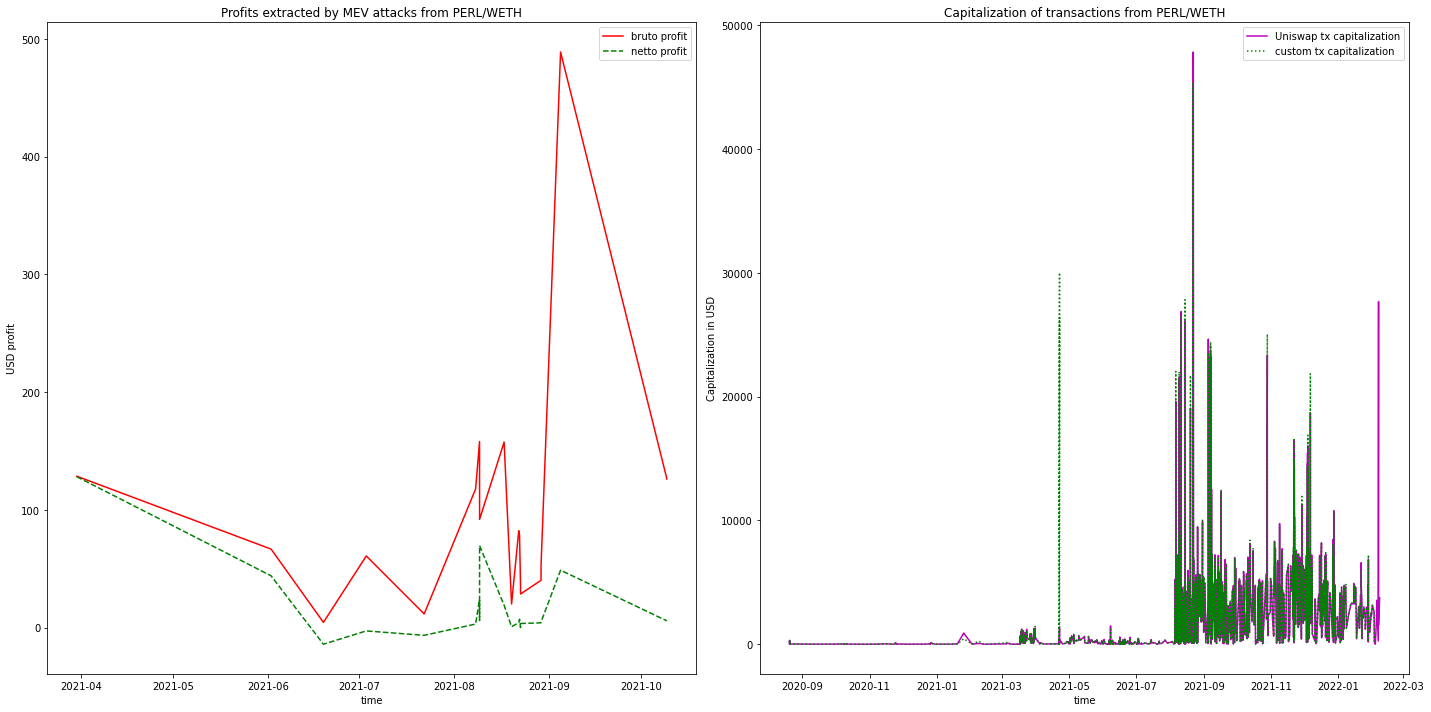

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_perl_weth_profits_df['timestamp'],
         grouped_perl_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_perl_weth_profits_df['timestamp'],
         grouped_perl_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from PERL/WETH')
ax1.legend()

ax2.plot(perl_weth_swaps_df['timestamp'],
         perl_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2.plot(perl_weth_swaps_df['timestamp'],
         perl_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2.set_title('Capitalization of transactions from PERL/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## BPT/WETH

In [49]:
bpt_weth_filtered_swaps_df, bpt_weth_mevs_df = bpt_weth_sim.extract_filtered_and_mevs_dfs()
bpt_weth_mevs_df

initial len = 3156, filtered len = 3114
txds = 42
out values = 21


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
178,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,250000
180,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,250000
258,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,600000
259,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,800000
289,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,250000
291,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,250000
320,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,250000
323,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,250000
335,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,600000
336,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,800000


In [50]:
bpt_weth_mevs_df = bpt_weth_sim.calculate_attack_profit(bpt_weth_mevs_df)
bpt_weth_mevs_df = bpt_weth_sim.calculate_attack_profit_by_token(bpt_weth_mevs_df)

In [51]:
bpt_price_df = bpt_weth_sim.get_daily_token_price(first_to_second=True, token_name='BPT')
bpt_price_df['date'] = bpt_price_df['date'].dt.strftime("%Y-%m-%d")
bpt_price_df

,date,BPT_price
0,2020-05-31,7.324759e-03
1,2020-06-06,3.451024e-01
2,2020-06-07,2.294917e-01
3,2020-06-08,1.654367e-01
4,2020-06-09,1.998926e-01
...,...,...
142,2021-06-23,3.132956e+07
143,2021-08-20,3.349674e+07
144,2021-08-24,3.775053e+07
145,2021-09-20,3.151174e+07


In [52]:
bpt_weth_mevs_df['date'] = bpt_weth_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
bpt_weth_mevs_df = pd.merge(bpt_weth_mevs_df, bpt_price_df, on='date', how='left')
bpt_weth_mevs_df = pd.merge(bpt_weth_mevs_df, weth_price_df, on='date', how='left')
bpt_weth_mevs_df = pd.merge(bpt_weth_mevs_df, sto_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [53]:
bpt_weth_mevs_df['bruto_bpt_to_usdc_profit'] = (bpt_weth_mevs_df['BPT_profit'] * bpt_weth_mevs_df['BPT_price'] *
                                                  bpt_weth_mevs_df['WETH_price'])
bpt_weth_mevs_df['bruto_total_profit'] = bpt_weth_mevs_df['bruto_bpt_to_usdc_profit'] + (bpt_weth_mevs_df['WETH_profit'] *
                                                                                            bpt_weth_mevs_df['WETH_price'])
bpt_weth_mevs_df.loc[bpt_weth_mevs_df['tx_fee'] >= 1, 'tx_fee'] = bpt_weth_mevs_df['tx_fee'].median()
bpt_weth_mevs_df.loc[bpt_weth_mevs_df['tx_fee'] == 0, 'tx_fee'] = bpt_weth_mevs_df['tx_fee'].median()
bpt_weth_mevs_df['gas_costs_usd'] = (bpt_weth_mevs_df['tx_fee'] * bpt_weth_mevs_df['WETH_price'] *
                                      bpt_weth_mevs_df['gas_usage_by_tx'])
bpt_weth_mevs_df['netto_profit'] = bpt_weth_mevs_df['bruto_total_profit'] - bpt_weth_mevs_df['gas_costs_usd']
bpt_weth_mevs_df.dropna(inplace=True)
bpt_weth_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,...,230.793746,10245241,120,103374,230.21,5.600000e-08,0.0,4.291813,1.336052,2.955761
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,...,230.793746,10245241,65,125262,230.21,5.600000e-08,0.0,4.291813,1.618942,2.672871
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,...,237.862517,10248437,8,99024,237.54,4.750000e-08,0.0,6.837202,1.118820,5.718383
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,...,237.862517,10248437,296,87540,237.54,3.000000e-08,0.0,6.837202,0.624675,6.212528
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,...,237.862517,10251014,38,125274,237.54,4.800000e-08,0.0,6.518840,1.430303,5.088536
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,...,237.862517,10251014,61,103398,237.54,4.800000e-08,0.0,6.518840,1.180536,5.338303
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,...,238.541195,10256065,108,103386,238.21,2.400000e-08,0.0,4.193796,0.591884,3.601913
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,...,238.541195,10256065,93,125262,238.21,2.400000e-08,0.0,4.193796,0.717124,3.476673
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,...,238.541195,10257857,8,99030,238.21,6.000000e-08,0.0,51.508680,1.417364,50.091316
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,...,238.541195,10257857,17,87540,238.21,5.100000e-08,0.0,51.508680,1.064977,50.443703


In [54]:
print(len(bpt_weth_mevs_df))
bpt_weth_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(bpt_weth_mevs_df))
bpt_weth_mevs_df

42
42


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,...,230.793746,10245241,120,103374,230.21,5.600000e-08,0.0,4.291813,1.336052,2.955761
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,...,230.793746,10245241,65,125262,230.21,5.600000e-08,0.0,4.291813,1.618942,2.672871
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,...,237.862517,10248437,8,99024,237.54,4.750000e-08,0.0,6.837202,1.118820,5.718383
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,...,237.862517,10248437,296,87540,237.54,3.000000e-08,0.0,6.837202,0.624675,6.212528
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,...,237.862517,10251014,38,125274,237.54,4.800000e-08,0.0,6.518840,1.430303,5.088536
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,...,237.862517,10251014,61,103398,237.54,4.800000e-08,0.0,6.518840,1.180536,5.338303
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,...,238.541195,10256065,108,103386,238.21,2.400000e-08,0.0,4.193796,0.591884,3.601913
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,...,238.541195,10256065,93,125262,238.21,2.400000e-08,0.0,4.193796,0.717124,3.476673
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,...,238.541195,10257857,8,99030,238.21,6.000000e-08,0.0,51.508680,1.417364,50.091316
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,...,238.541195,10257857,17,87540,238.21,5.100000e-08,0.0,51.508680,1.064977,50.443703


### Bigger sandwiches and profits

In [55]:
bpt_weth_count_df = bpt_weth_mevs_df.value_counts(subset=['timestamp'])
bpt_weth_count_df[bpt_weth_count_df.values > 2]

Series([], dtype: int64)

In [56]:
grouped_bpt_weth_profits_df = bpt_weth_mevs_df.groupby(by=['timestamp']).sum()
grouped_bpt_weth_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_bpt_weth_profits_df['block'] = grouped_bpt_weth_profits_df['block'] / 2
grouped_bpt_weth_profits_df['bruto_total_profit'] = grouped_bpt_weth_profits_df['bruto_total_profit']/2
grouped_bpt_weth_profits_df['netto_profit'] = (grouped_bpt_weth_profits_df['bruto_total_profit'] -
                                               grouped_bpt_weth_profits_df['gas_costs_usd'])
grouped_bpt_weth_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_bpt_weth_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_bpt_weth_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_bpt_weth_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_bpt_weth_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(bpt_weth_mevs_df[bpt_weth_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(bpt_weth_mevs_df[bpt_weth_mevs_df['netto_profit'] < 0])}")

max brutto profit 76.57980402125123
min brutto profit 1.0960766056719384
max netto profit 74.36748395827571
min netto profit -0.5718012539950819
zero bruto profit transactions = 0
transactions with losses = 0


In [57]:
print(fr"sum of paid gas = {sum(bpt_weth_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(bpt_weth_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(bpt_weth_mevs_df['bruto_total_profit'] / 2) - sum(bpt_weth_mevs_df['gas_costs_usd'])}")

sum of paid gas = 41.229746803290965
sum of brutto profits = 236.40302650385524
sum of netto profits = 195.17327970056428


### Brutto profit to Uniswap capitalization coefficient

In [58]:
print("brutto attacks profits (" + str(sum(bpt_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to BPT/WETH Uniswap capitalization (" + str(bpt_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(bpt_weth_mevs_df['bruto_total_profit'] / 2) / bpt_weth_swaps_df['amount_usd'].sum()))

brutto attacks profits (236.40302650385524) to BPT/WETH Uniswap capitalization (686110.8150743842) coef is equal to 0.0003445551670515874


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [59]:
bpt_weth_swaps_df = bpt_weth_sim.calculate_attack_profit_by_token(bpt_weth_swaps_df)
bpt_weth_swaps_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,BPT_profit,WETH_profit
0,BPT,WETH,0.028860,5.899406,981.913051,2020-05-31 20:25:35,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x96c3ba83d4aacebef71866ecaa8d57a5d681bf470e20...,18000000000,195297,0.028860,5.899406,0.0,0.0
1,WETH,BPT,0.100000,0.001160,23.833425,2020-05-31 20:34:44,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x19bc2718782f2ae9d22c66d4d364394ecad1a771,0x8f4a0a3e964ff565c46d788ebef3ec25cc589a37b379...,17000000000,165928,0.001160,0.100000,0.0,0.0
2,WETH,BPT,0.050000,0.000559,11.843336,2020-05-31 20:38:21,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x19bc2718782f2ae9d22c66d4d364394ecad1a771,0xe31f8cb2aa234d1f690c063577702a9be98c10670f51...,17000000000,149166,0.000559,0.050000,0.0,0.0
3,WETH,BPT,1.000000,0.008956,263.136013,2020-05-31 21:03:51,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x2593ca08fda3c2526409493cd1ffa3f656d0b7c6,0x712c35f27ffe151a02846fd3748ff034e6d123b45ca0...,19000000000,165928,0.008956,1.000000,0.0,0.0
4,BPT,WETH,0.010674,0.213296,25.501870,2020-06-06 07:04:33,0x693c188e40f760ecf00d2946ef45260b84fbc43e,0x693c188e40f760ecf00d2946ef45260b84fbc43e,0xa4526e81d57c9a1f5dbeede9b333ac9f7806e88260f0...,61000000000,299383,0.010674,0.213296,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,WETH,BPT,0.004000,89828.981912,13.227908,2021-08-24 00:59:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xce6e51ae6a876feb78df6bd7ce224935d249d61f,0x434eae879295625399358b088daffab5e28fe426ce3b...,64051307712,152654,89828.981912,0.004000,0.0,0.0
3152,WETH,BPT,0.005000,82946.747246,16.459484,2021-08-24 01:27:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xce6e51ae6a876feb78df6bd7ce224935d249d61f,0x6810a641f416cb9ad102ac82a73ad3c375e02f75e137...,62701766040,152654,82946.747246,0.005000,0.0,0.0
3153,BPT,WETH,308326.263648,0.013275,44.069736,2021-08-24 10:46:30,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xfeb0ca3b8abb121c3abeecd2729b46a38ed4d972af87...,32336899188,314743,308326.263648,0.013275,0.0,0.0
3154,WETH,BPT,0.002000,68782.696426,6.129898,2021-09-20 19:58:11,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x03711e1f9e1c1767690958a1fc6f4a88ec74253c,0x3228d95f8ced3dd842d050c83a44d980afb713a665c9...,74613063460,173500,68782.696426,0.002000,0.0,0.0


In [60]:
bpt_price_df = bpt_weth_sim.get_daily_token_price(first_to_second=True, token_name='BPT')
bpt_price_df['date'] = bpt_price_df['date'].dt.strftime("%Y-%m-%d")
bpt_price_df

,date,BPT_price
0,2020-05-31,7.324759e-03
1,2020-06-06,3.451024e-01
2,2020-06-07,2.294917e-01
3,2020-06-08,1.654367e-01
4,2020-06-09,1.998926e-01
...,...,...
142,2021-06-23,3.132956e+07
143,2021-08-20,3.349674e+07
144,2021-08-24,3.775053e+07
145,2021-09-20,3.151174e+07


In [61]:
bpt_weth_swaps_df['date'] = bpt_weth_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
bpt_weth_swaps_df = pd.merge(bpt_weth_swaps_df, bpt_price_df, on='date', how='left')
bpt_weth_swaps_df = pd.merge(bpt_weth_swaps_df, weth_price_df, on='date', how='left')
bpt_weth_swaps_df['cap_bpt_to_usdc'] = (bpt_weth_swaps_df['second_token_value'] * bpt_weth_swaps_df['BPT_price'] *
                                          bpt_weth_swaps_df['BPT_price'])
bpt_weth_swaps_df['total_cap'] = bpt_weth_swaps_df['cap_bpt_to_usdc'] + (bpt_weth_swaps_df['first_token_value'] *
                                                                            bpt_weth_swaps_df['WETH_price'])

In [62]:
print("brutto attacks profits (" + str(sum(bpt_weth_mevs_df['bruto_total_profit'] / 2)) +
      ") to BPT/WETH custom capitalization (" + str(bpt_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(bpt_weth_mevs_df['bruto_total_profit'] / 2) / bpt_weth_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (236.40302650385524) to BPT/WETH custom capitalization (72857485278896.39) coef is equal to 8.111830431660905e-13


### Netto profit to Uniswap capitalization coefficient

In [63]:
print("netto attacks profits (" + str(sum(bpt_weth_mevs_df['netto_profit'] / 2)) +
      ") to BPT/WETH Uniswap capitalization (" + str(bpt_weth_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(bpt_weth_mevs_df['netto_profit'] / 2) / bpt_weth_swaps_df['amount_usd'].sum()))

netto attacks profits (215.78815310220972) to BPT/WETH Uniswap capitalization (686110.8150743842) coef is equal to 0.0003145091847572978


### Netto profit to custom capitalization coefficient

In [64]:
print("netto attacks profits (" + str(sum(bpt_weth_mevs_df['netto_profit'] / 2)) +
      ") to BPT/WETH custom capitalization (" + str(bpt_weth_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(bpt_weth_mevs_df['netto_profit'] / 2) / bpt_weth_swaps_df['total_cap'].sum() / 2))

netto attacks profits (215.78815310220972) to BPT/WETH custom capitalization (72857485278896.39) coef is equal to 7.404460649313478e-13


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [65]:
print("BPT/WETH pool contains " + str(len(bpt_weth_mevs_df) / 2) + " MEV attacks (or " +
      str(len(bpt_weth_mevs_df)) + " MEV transactions) out of " + str(len(bpt_weth_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(bpt_weth_mevs_df) / 2) / len(bpt_weth_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(bpt_weth_mevs_df) / len(bpt_weth_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(bpt_weth_mevs_df['amount_usd'].sum() / bpt_weth_swaps_df['amount_usd'].sum()))

BPT/WETH pool contains 21.0 MEV attacks (or 42 MEV transactions) out of 3156 total transactions.
Coefficient of MEV attacks = 0.006653992395437262; coefficient of MEV transactions = 0.013307984790874524
Coef of MEV attacks cap = 0.01334132500562787


### Distributions of profits and capitalizations

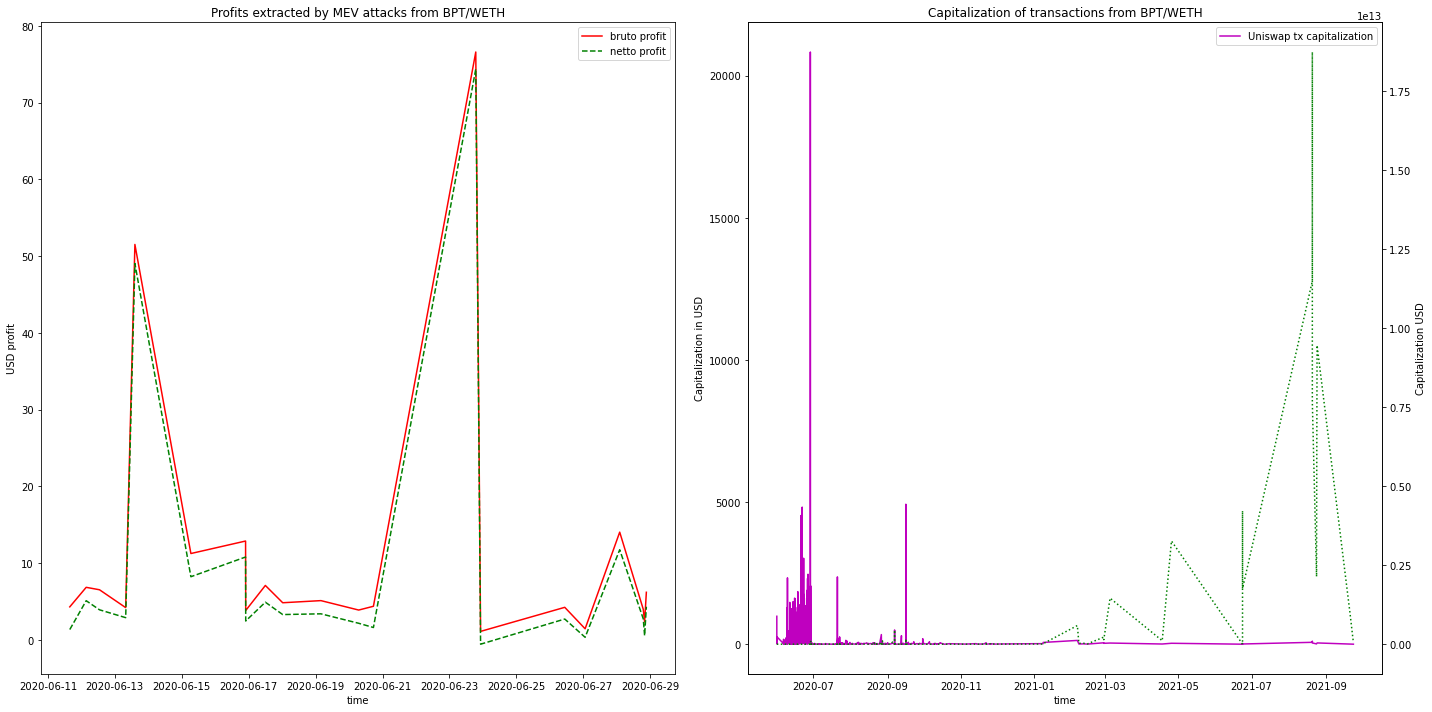

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_bpt_weth_profits_df['timestamp'],
         grouped_bpt_weth_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_bpt_weth_profits_df['timestamp'],
         grouped_bpt_weth_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from BPT/WETH')
ax1.legend()

ax2_2 = ax2.twinx()
ax2.plot(bpt_weth_swaps_df['timestamp'],
         bpt_weth_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2_2.plot(bpt_weth_swaps_df['timestamp'],
         bpt_weth_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2_2.set_ylabel('Capitalization USD')
ax2.set_title('Capitalization of transactions from BPT/WETH')
ax2.legend()

plt.tight_layout()
plt.show()

## uSTONKS_APR_21/USDC

In [67]:
ustonks_usdc_filtered_swaps_df, ustonks_usdc_mevs_df = ustonks_usdc_sim.extract_filtered_and_mevs_dfs()
ustonks_usdc_mevs_df

initial len = 175, filtered len = 175
txds = 0
out values = 0


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used


## mAMZN/UST

In [68]:
mamzn_ust_filtered_swaps_df, mamzn_ust_mevs_df = mamzn_ust_sim.extract_filtered_and_mevs_dfs()
mamzn_ust_mevs_df

initial len = 1802, filtered len = 1778
txds = 24
out values = 12


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
582,mAMZN,UST,12.810086,49849.879323,24895.476690,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x514a2d8c72567cd6688076d501893e39f762d99973cf...,109989999999,500000
584,UST,mAMZN,49595.776238,12.810086,24768.575330,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a0652...,109990000001,500000
686,mAMZN,UST,16.777622,54901.530174,27634.471311,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5acce74583f62f5354803c1ea3a0321471acd2f64e69...,209999999999,500000
687,UST,mAMZN,54242.170058,16.777622,27302.584966,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x7a3435524e97f3b6098c513c819669c275f1b119d7ae...,210010000000,500000
736,mAMZN,UST,4.709542,15234.737150,7659.169739,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x3c58c9fb6d5e3c4066f756dc6b8c4d71de1c4b605469...,164999990000,500000
738,UST,mAMZN,15027.261294,4.709542,7539.931667,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xbbb8dfdce21dde62716dab903598add6a0dd4a0ac51c...,165010000000,500000
743,UST,mAMZN,90100.482953,27.760221,45247.950796,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x63ed80e1fc096b303d61a8e7b507488104aa2aeb5843...,119010000000,500000
744,mAMZN,UST,27.760221,91008.284180,45703.843416,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xae29541526cc1a7eeff9d23d79681b9bcbbcf2d6ce4e...,118999990000,500000
829,mAMZN,UST,7.472246,23870.883515,11895.520297,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x0da5b4a877cd45dc022a482288518afd41d1472404a3...,107999990000,500000
830,UST,mAMZN,23514.819975,7.472246,11719.442850,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x69dd2ea2b0503619e4b5965639a565483a61f6c3b772...,108010000000,500000


In [69]:
mamzn_ust_mevs_df = mamzn_ust_sim.calculate_attack_profit(mamzn_ust_mevs_df)
mamzn_ust_mevs_df = mamzn_ust_sim.calculate_attack_profit_by_token(mamzn_ust_mevs_df)

In [70]:
mamzn_price_df = mamzn_ust_sim.get_daily_token_price(first_to_second=False, token_name='mAMZN')
mamzn_price_df['date'] = mamzn_price_df['date'].dt.strftime("%Y-%m-%d")
mamzn_price_df

,date,mAMZN_price
0,2020-12-03,3549.377513
1,2020-12-04,3130.586675
2,2020-12-05,3284.050467
3,2020-12-06,3463.577851
4,2020-12-07,3196.654937
...,...,...
367,2022-01-31,3015.344916
368,2022-02-01,3085.680850
369,2022-02-02,3101.415353
370,2022-02-03,3168.028902


In [71]:
mamzn_ust_mevs_df['date'] = mamzn_ust_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mamzn_ust_mevs_df = pd.merge(mamzn_ust_mevs_df, mamzn_price_df, on='date', how='left')
mamzn_ust_mevs_df = pd.merge(mamzn_ust_mevs_df, weth_price_df, on='date', how='left')
mamzn_ust_mevs_df = pd.merge(mamzn_ust_mevs_df, sto_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [72]:
mamzn_ust_mevs_df['bruto_mamzn_to_ust_profit'] = mamzn_ust_mevs_df['mAMZN_profit'] * mamzn_ust_mevs_df['mAMZN_price']
mamzn_ust_mevs_df['bruto_total_profit'] = mamzn_ust_mevs_df['bruto_mamzn_to_ust_profit'] + mamzn_ust_mevs_df['UST_profit']
mamzn_ust_mevs_df.loc[mamzn_ust_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mamzn_ust_mevs_df['tx_fee'].median()
mamzn_ust_mevs_df.loc[mamzn_ust_mevs_df['tx_fee'] == 0, 'tx_fee'] = mamzn_ust_mevs_df['tx_fee'].median()
mamzn_ust_mevs_df['gas_costs_usd'] = (mamzn_ust_mevs_df['tx_fee'] * mamzn_ust_mevs_df['WETH_price'] *
                                      mamzn_ust_mevs_df['gas_usage_by_tx'])
mamzn_ust_mevs_df['netto_profit'] = mamzn_ust_mevs_df['bruto_total_profit'] - mamzn_ust_mevs_df['gas_costs_usd']
mamzn_ust_mevs_df.dropna(inplace=True)
mamzn_ust_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mamzn_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAMZN,UST,12.810086,49849.879323,24895.476690,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x514a2d8c72567cd6688076d501893e39f762d99973cf...,109989999999,...,1809.369652,11854877.0,130.0,110222.0,1802.96,1.099900e-07,0.0,254.103086,21.935563,232.167522
1,UST,mAMZN,49595.776238,12.810086,24768.575330,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a0652...,109990000001,...,1809.369652,11854877.0,128.0,122308.0,1802.96,1.099900e-07,0.0,254.103086,24.340829,229.762256
2,mAMZN,UST,16.777622,54901.530174,27634.471311,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5acce74583f62f5354803c1ea3a0321471acd2f64e69...,209999999999,...,1620.802647,11917264.0,147.0,110222.0,1625.17,2.100000e-07,0.0,659.360116,37.516103,621.844013
3,UST,mAMZN,54242.170058,16.777622,27302.584966,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x7a3435524e97f3b6098c513c819669c275f1b119d7ae...,210010000000,...,1620.802647,11917264.0,144.0,122308.0,1625.17,2.100100e-07,0.0,659.360116,41.631780,617.728336
4,mAMZN,UST,4.709542,15234.737150,7659.169739,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x3c58c9fb6d5e3c4066f756dc6b8c4d71de1c4b605469...,164999990000,...,1567.167449,11953307.0,112.0,110222.0,1571.49,1.650000e-07,0.0,207.475856,28.501493,178.974363
5,UST,mAMZN,15027.261294,4.709542,7539.931667,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xbbb8dfdce21dde62716dab903598add6a0dd4a0ac51c...,165010000000,...,1567.167449,11953307.0,78.0,122308.0,1571.49,1.650100e-07,0.0,207.475856,31.628641,175.847215
6,UST,mAMZN,90100.482953,27.760221,45247.950796,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x63ed80e1fc096b303d61a8e7b507488104aa2aeb5843...,119010000000,...,1491.957808,11957017.0,150.0,122320.0,1488.67,1.190100e-07,0.0,907.801226,21.718882,886.082344
7,mAMZN,UST,27.760221,91008.284180,45703.843416,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xae29541526cc1a7eeff9d23d79681b9bcbbcf2d6ce4e...,118999990000,...,1491.957808,11957017.0,166.0,110234.0,1488.67,1.190000e-07,0.0,907.801226,19.571271,888.229955
8,mAMZN,UST,7.472246,23870.883515,11895.520297,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x0da5b4a877cd45dc022a482288518afd41d1472404a3...,107999990000,...,1926.534040,12029082.0,142.0,110222.0,1921.18,1.080000e-07,0.0,356.063540,22.933413,333.130127
9,UST,mAMZN,23514.819975,7.472246,11719.442850,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x69dd2ea2b0503619e4b5965639a565483a61f6c3b772...,108010000000,...,1926.534040,12029082.0,137.0,122308.0,1921.18,1.080100e-07,0.0,356.063540,25.450453,330.613087


In [73]:
print(len(mamzn_ust_mevs_df))
mamzn_ust_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(mamzn_ust_mevs_df))
mamzn_ust_mevs_df

22
22


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mamzn_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAMZN,UST,12.810086,49849.879323,24895.476690,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x514a2d8c72567cd6688076d501893e39f762d99973cf...,109989999999,...,1809.369652,11854877.0,130.0,110222.0,1802.96,1.099900e-07,0.0,254.103086,21.935563,232.167522
1,UST,mAMZN,49595.776238,12.810086,24768.575330,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a0652...,109990000001,...,1809.369652,11854877.0,128.0,122308.0,1802.96,1.099900e-07,0.0,254.103086,24.340829,229.762256
2,mAMZN,UST,16.777622,54901.530174,27634.471311,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5acce74583f62f5354803c1ea3a0321471acd2f64e69...,209999999999,...,1620.802647,11917264.0,147.0,110222.0,1625.17,2.100000e-07,0.0,659.360116,37.516103,621.844013
3,UST,mAMZN,54242.170058,16.777622,27302.584966,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x7a3435524e97f3b6098c513c819669c275f1b119d7ae...,210010000000,...,1620.802647,11917264.0,144.0,122308.0,1625.17,2.100100e-07,0.0,659.360116,41.631780,617.728336
4,mAMZN,UST,4.709542,15234.737150,7659.169739,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x3c58c9fb6d5e3c4066f756dc6b8c4d71de1c4b605469...,164999990000,...,1567.167449,11953307.0,112.0,110222.0,1571.49,1.650000e-07,0.0,207.475856,28.501493,178.974363
5,UST,mAMZN,15027.261294,4.709542,7539.931667,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xbbb8dfdce21dde62716dab903598add6a0dd4a0ac51c...,165010000000,...,1567.167449,11953307.0,78.0,122308.0,1571.49,1.650100e-07,0.0,207.475856,31.628641,175.847215
6,UST,mAMZN,90100.482953,27.760221,45247.950796,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x63ed80e1fc096b303d61a8e7b507488104aa2aeb5843...,119010000000,...,1491.957808,11957017.0,150.0,122320.0,1488.67,1.190100e-07,0.0,907.801226,21.718882,886.082344
7,mAMZN,UST,27.760221,91008.284180,45703.843416,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xae29541526cc1a7eeff9d23d79681b9bcbbcf2d6ce4e...,118999990000,...,1491.957808,11957017.0,166.0,110234.0,1488.67,1.190000e-07,0.0,907.801226,19.571271,888.229955
8,mAMZN,UST,7.472246,23870.883515,11895.520297,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x0da5b4a877cd45dc022a482288518afd41d1472404a3...,107999990000,...,1926.534040,12029082.0,142.0,110222.0,1921.18,1.080000e-07,0.0,356.063540,22.933413,333.130127
9,UST,mAMZN,23514.819975,7.472246,11719.442850,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x69dd2ea2b0503619e4b5965639a565483a61f6c3b772...,108010000000,...,1926.534040,12029082.0,137.0,122308.0,1921.18,1.080100e-07,0.0,356.063540,25.450453,330.613087


### Bigger sandwiches and profits

In [74]:
mamzn_ust_count_df = mamzn_ust_mevs_df.value_counts(subset=['timestamp'])
mamzn_ust_count_df[mamzn_ust_count_df.values > 2]

Series([], dtype: int64)

In [75]:
grouped_mamzn_ust_profits_df = mamzn_ust_mevs_df.groupby(by=['timestamp']).sum()
grouped_mamzn_ust_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_mamzn_ust_profits_df['block'] = grouped_mamzn_ust_profits_df['block'] / 2
grouped_mamzn_ust_profits_df['bruto_total_profit'] = grouped_mamzn_ust_profits_df['bruto_total_profit']/2
grouped_mamzn_ust_profits_df['netto_profit'] = (grouped_mamzn_ust_profits_df['bruto_total_profit'] -
                                               grouped_mamzn_ust_profits_df['gas_costs_usd'])
grouped_mamzn_ust_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_mamzn_ust_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_mamzn_ust_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_mamzn_ust_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_mamzn_ust_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(mamzn_ust_mevs_df[mamzn_ust_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(mamzn_ust_mevs_df[mamzn_ust_mevs_df['netto_profit'] < 0])}")

max brutto profit 2136.7055862759807
min brutto profit 206.22086348331868
max netto profit 2093.168922848153
min netto profit 134.42871691850598
zero bruto profit transactions = 0
transactions with losses = 0


In [76]:
print(fr"sum of paid gas = {sum(mamzn_ust_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2) - sum(mamzn_ust_mevs_df['gas_costs_usd'])}")

sum of paid gas = 1567.0534433707112
sum of brutto profits = 7350.920968402053
sum of netto profits = 5783.867525031343


### Brutto profit to Uniswap capitalization coefficient

In [77]:
print("brutto attacks profits (" + str(sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mAMZN/UST Uniswap capitalization (" + str(mamzn_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2) / mamzn_ust_swaps_df['amount_usd'].sum()))

brutto attacks profits (7350.920968402053) to mAMZN/UST Uniswap capitalization (22492139.112098604) coef is equal to 0.0003268217812350256


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [78]:
mamzn_ust_swaps_df = mamzn_ust_sim.calculate_attack_profit_by_token(mamzn_ust_swaps_df)
mamzn_ust_swaps_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mAMZN_profit
0,UST,mAMZN,2350.000000,0.726130,1289.197989,2020-12-03 19:08:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xf53cab0c6f25f48f985d1e2c40e03fc7c1963364,0xf5c5766c2684fdd0997bf77520eb59828466e17f263b...,40000000000,178312,2350.000000,0.726130,0.0,0.0
1,UST,mAMZN,4300.000000,1.300860,2326.242409,2020-12-03 19:09:07,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x4add3b2277e1a79e4cf6b52ccb26b2c80b37f142,0xb10cd689a829a7e356b73596d6fca504a11421d9387f...,33000000000,178312,4300.000000,1.300860,0.0,0.0
2,UST,mAMZN,2884.657644,0.853276,1532.971308,2020-12-03 19:16:53,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xdec08cb92a506b88411da9ba290f3694be223c26,0x746b2fc227338792f29f6f22f4c5e06f21a12183e973...,50000000000,144815,2884.657644,0.853276,0.0,0.0
3,mAMZN,UST,0.400000,1350.538418,719.845223,2020-12-03 19:21:42,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xdec08cb92a506b88411da9ba290f3694be223c26,0x215b96593f26c2b770b98fa8c89ad72585395c5cd994...,50000000000,144711,1350.538418,0.400000,0.0,0.0
4,mAMZN,UST,0.400000,1339.406326,714.389322,2020-12-03 19:22:29,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xdec08cb92a506b88411da9ba290f3694be223c26,0x7d96885b515444001a8d60e19fc600aab4cafcf1ab54...,50000000000,144711,1339.406326,0.400000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,mAMZN,UST,4.213942,13469.674766,6729.578802,2022-02-03 22:38:45,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe8a31d203baa1837a3e88ead9517f88639c7ffb7,0x7e2ab20daf968a4371103f65102cb883b3e83d89b6b1...,111160112138,250000,13469.674766,4.213942,0.0,0.0
1798,mAMZN,UST,4.936554,15657.582490,7824.798795,2022-02-03 22:43:07,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x2c691e3c7c05ebd156e40684ee299f2de62a9fd7,0x13d73ccc6dfa9886b1333be4b37200fa426b0f04ca9d...,215000000000,150000,15657.582490,4.936554,0.0,0.0
1799,mAMZN,UST,9.794544,30682.971559,15321.774663,2022-02-04 11:47:41,0x1111111254fb6c44bac0bed2854e76f90643097d,0x28645d690057b73ac8511ed34d2921992a8085ee,0xa9263efc44b5d3d22e53633120307e95e9022b2019f5...,64690999675,133388,30682.971559,9.794544,0.0,0.0
1800,UST,mAMZN,25000.000000,7.945034,12500.353825,2022-02-04 15:23:45,0x1111111254fb6c44bac0bed2854e76f90643097d,0x5690df030163680f4da2046798614c3f5c24f64a,0x4f173fa6a57e128a4b8e9f3c364b6202976b5f890f65...,76523147078,133413,25000.000000,7.945034,0.0,0.0


In [79]:
mamzn_price_df = mamzn_ust_sim.get_daily_token_price(first_to_second=False, token_name='mAMZN')
mamzn_price_df['date'] = mamzn_price_df['date'].dt.strftime("%Y-%m-%d")
mamzn_price_df

,date,mAMZN_price
0,2020-12-03,3549.377513
1,2020-12-04,3130.586675
2,2020-12-05,3284.050467
3,2020-12-06,3463.577851
4,2020-12-07,3196.654937
...,...,...
367,2022-01-31,3015.344916
368,2022-02-01,3085.680850
369,2022-02-02,3101.415353
370,2022-02-03,3168.028902


In [80]:
mamzn_ust_swaps_df['date'] = mamzn_ust_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
mamzn_ust_swaps_df = pd.merge(mamzn_ust_swaps_df, mamzn_price_df, on='date', how='left')
mamzn_ust_swaps_df = pd.merge(mamzn_ust_swaps_df, weth_price_df, on='date', how='left')
mamzn_ust_swaps_df['cap_mamzn_to_ust'] = mamzn_ust_swaps_df['second_token_value'] * mamzn_ust_swaps_df['mAMZN_price']
mamzn_ust_swaps_df['total_cap'] = mamzn_ust_swaps_df['cap_mamzn_to_ust'] + mamzn_ust_swaps_df['first_token_value']

In [81]:
print("brutto attacks profits (" + str(sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mAMZN/UST custom capitalization (" + str(mamzn_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mamzn_ust_mevs_df['bruto_total_profit'] / 2) / mamzn_ust_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (7350.920968402053) to mAMZN/UST custom capitalization (44936977.43794372) coef is equal to 4.08957243427943e-05


### Netto profit to Uniswap capitalization coefficient

In [82]:
print("netto attacks profits (" + str(sum(mamzn_ust_mevs_df['netto_profit'] / 2)) +
      ") to mAMZN/UST Uniswap capitalization (" + str(mamzn_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mamzn_ust_mevs_df['netto_profit'] / 2) / mamzn_ust_swaps_df['amount_usd'].sum()))

netto attacks profits (6567.394246716699) to mAMZN/UST Uniswap capitalization (22492139.112098604) coef is equal to 0.00029198620077821203


### Netto profit to custom capitalization coefficient

In [83]:
print("netto attacks profits (" + str(sum(mamzn_ust_mevs_df['netto_profit'] / 2)) +
      ") to mAMZN/UST custom capitalization (" + str(mamzn_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mamzn_ust_mevs_df['netto_profit'] / 2) / mamzn_ust_swaps_df['total_cap'].sum() / 2))

netto attacks profits (6567.394246716699) to mAMZN/UST custom capitalization (44936977.43794372) coef is equal to 3.653669328219741e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [84]:
print("mAMZN/UST pool contains " + str(len(mamzn_ust_mevs_df) / 2) + " MEV attacks (or " +
      str(len(mamzn_ust_mevs_df)) + " MEV transactions) out of " + str(len(mamzn_ust_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(mamzn_ust_mevs_df) / 2) / len(mamzn_ust_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(mamzn_ust_mevs_df) / len(mamzn_ust_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(mamzn_ust_mevs_df['amount_usd'].sum() / mamzn_ust_swaps_df['amount_usd'].sum()))

mAMZN/UST pool contains 11.0 MEV attacks (or 22 MEV transactions) out of 1802 total transactions.
Coefficient of MEV attacks = 0.006104328523862375; coefficient of MEV transactions = 0.01220865704772475
Coef of MEV attacks cap = 0.020112396697983044


### Distributions of profits and capitalizations

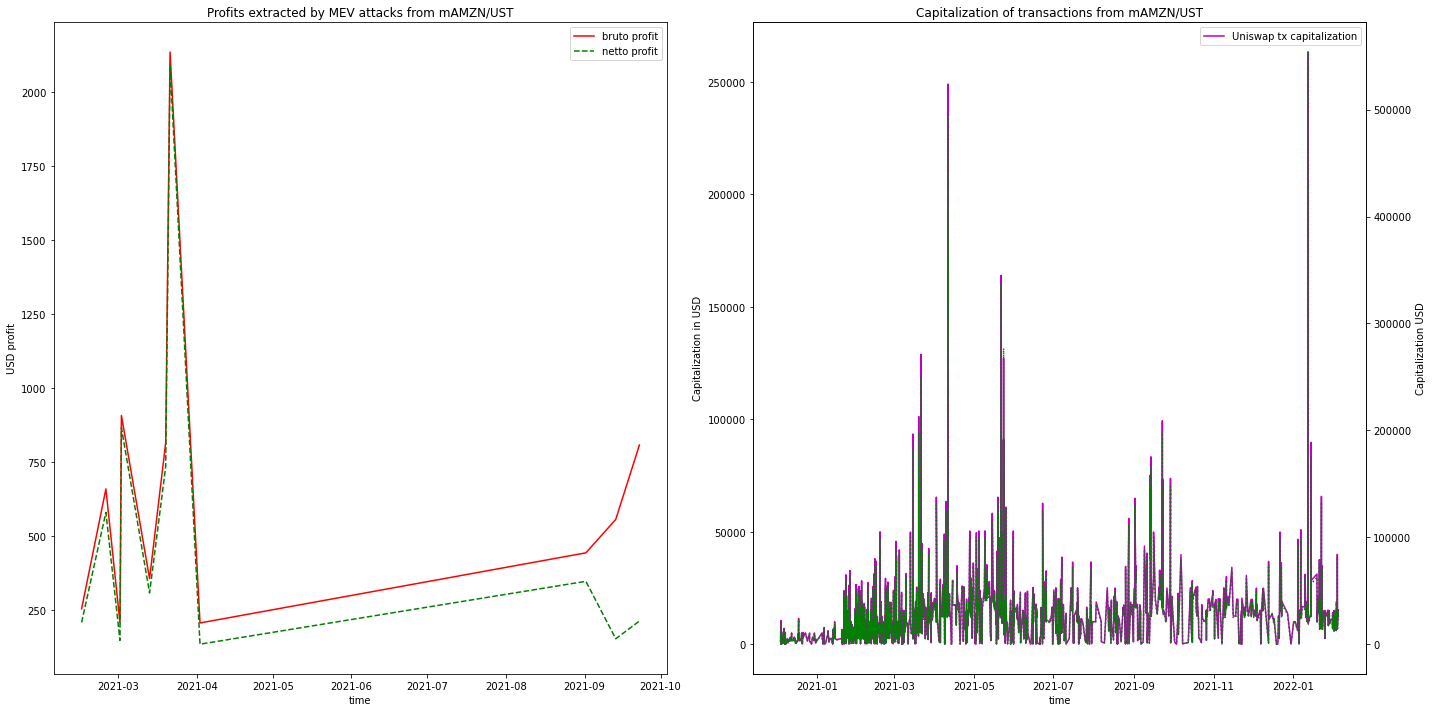

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_mamzn_ust_profits_df['timestamp'],
         grouped_mamzn_ust_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_mamzn_ust_profits_df['timestamp'],
         grouped_mamzn_ust_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from mAMZN/UST')
ax1.legend()

ax2_2 = ax2.twinx()
ax2.plot(mamzn_ust_swaps_df['timestamp'],
         mamzn_ust_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2_2.plot(mamzn_ust_swaps_df['timestamp'],
         mamzn_ust_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2_2.set_ylabel('Capitalization USD')
ax2.set_title('Capitalization of transactions from mAMZN/UST')
ax2.legend()

plt.tight_layout()
plt.show()

## mBABA/UST

In [86]:
mbaba_ust_filtered_swaps_df, mbaba_ust_mevs_df = mbaba_ust_sim.extract_filtered_and_mevs_dfs()
mbaba_ust_mevs_df

initial len = 2035, filtered len = 2025
txds = 10
out values = 5


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
616,mBABA,UST,82.048097,21975.815599,11065.461861,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x56a5453e5439565bc4e935ae8983e06404542efbb0e5...,284999999999,500000
618,UST,mBABA,21715.541727,82.048097,10934.406402,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xaeecbc1aa0c9dab3c9346fb5f83cb70969ae34018e7c...,285010000000,500000
627,UST,mBABA,115547.742106,447.193789,58365.800405,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2110ba0a8ff4cb446b8f05191f5f8f77c05d00635285...,129010000000,500000
628,mBABA,UST,447.193789,115888.048879,58535.885568,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x26ffa7d3836a4b5d6cf88ba754b75385c2cc8c3b3c21...,128999999999,500000
1515,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,2000000
1517,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,2000000
1542,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,400000
1543,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,400000
1643,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,270297
1644,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,260985


In [87]:
mbaba_ust_mevs_df = mbaba_ust_sim.calculate_attack_profit(mbaba_ust_mevs_df)
mbaba_ust_mevs_df = mbaba_ust_sim.calculate_attack_profit_by_token(mbaba_ust_mevs_df)

In [88]:
mbaba_price_df = mbaba_ust_sim.get_daily_token_price(first_to_second=False, token_name='mBABA')
mbaba_price_df['date'] = mbaba_price_df['date'].dt.strftime("%Y-%m-%d")
mbaba_price_df

,date,mBABA_price
0,2020-12-03,265.930790
1,2020-12-04,268.928156
2,2020-12-05,279.389109
3,2020-12-06,284.440574
4,2020-12-07,265.203701
...,...,...
378,2022-01-31,128.378525
379,2022-02-01,132.217792
380,2022-02-02,128.533221
381,2022-02-03,128.540856


In [89]:
mbaba_ust_mevs_df['date'] = mbaba_ust_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mbaba_ust_mevs_df = pd.merge(mbaba_ust_mevs_df, mbaba_price_df, on='date', how='left')
mbaba_ust_mevs_df = pd.merge(mbaba_ust_mevs_df, weth_price_df, on='date', how='left')
mbaba_ust_mevs_df = pd.merge(mbaba_ust_mevs_df, sto_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [90]:
mbaba_ust_mevs_df['bruto_mbaba_to_ust_profit'] = mbaba_ust_mevs_df['mBABA_profit'] * mbaba_ust_mevs_df['mBABA_price']
mbaba_ust_mevs_df['bruto_total_profit'] = mbaba_ust_mevs_df['bruto_mbaba_to_ust_profit'] + mbaba_ust_mevs_df['UST_profit']
mbaba_ust_mevs_df.loc[mbaba_ust_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mbaba_ust_mevs_df['tx_fee'].median()
mbaba_ust_mevs_df.loc[mbaba_ust_mevs_df['tx_fee'] == 0, 'tx_fee'] = mbaba_ust_mevs_df['tx_fee'].median()
mbaba_ust_mevs_df['gas_costs_usd'] = (mbaba_ust_mevs_df['tx_fee'] * mbaba_ust_mevs_df['WETH_price'] *
                                      mbaba_ust_mevs_df['gas_usage_by_tx'])
mbaba_ust_mevs_df['netto_profit'] = mbaba_ust_mevs_df['bruto_total_profit'] - mbaba_ust_mevs_df['gas_costs_usd']
mbaba_ust_mevs_df.dropna(inplace=True)
mbaba_ust_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mbaba_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mBABA,UST,82.048097,21975.815599,11065.461861,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x56a5453e5439565bc4e935ae8983e06404542efbb0e5...,284999999999,...,1572.732378,11911661,105,115230,1578.19,2.850000e-07,0.0,260.273872,51.649396,208.624476
1,UST,mBABA,21715.541727,82.048097,10934.406402,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xaeecbc1aa0c9dab3c9346fb5f83cb70969ae34018e7c...,285010000000,...,1572.732378,11911661,103,137308,1578.19,2.850100e-07,0.0,260.273872,61.547550,198.726322
2,UST,mBABA,115547.742106,447.193789,58365.800405,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2110ba0a8ff4cb446b8f05191f5f8f77c05d00635285...,129010000000,...,1620.802647,11919112,41,137320,1625.17,1.290100e-07,0.0,340.306773,28.713578,311.593196
3,mBABA,UST,447.193789,115888.048879,58535.885568,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x26ffa7d3836a4b5d6cf88ba754b75385c2cc8c3b3c21...,128999999999,...,1620.802647,11919112,156,95234,1625.17,1.290000e-07,0.0,340.306773,19.911862,320.394911
4,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,...,3234.264591,13067645,2,156517,3226.59,3.476130e-08,0.0,405.842005,17.596777,388.245228
5,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,...,3234.264591,13067645,4,123126,3226.59,3.476130e-08,0.0,405.842005,13.842718,391.999287
6,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,...,3173.614111,13086996,2,133773,3172.57,4.793013e-08,0.0,291.141225,20.348441,270.792783
7,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,...,3173.614111,13086996,0,159961,3172.57,4.793013e-08,0.0,291.141225,24.331943,266.809282
8,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,...,3429.506028,13250059,3,180198,3435.76,4.160346e-08,0.0,176.817001,25.710529,151.106471
9,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,...,3429.506028,13250059,5,173990,3435.76,1.555963e-07,0.0,176.817001,92.844287,83.972714


In [91]:
print(len(mbaba_ust_mevs_df))
mbaba_ust_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(mbaba_ust_mevs_df))
mbaba_ust_mevs_df

10
10


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mbaba_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mBABA,UST,82.048097,21975.815599,11065.461861,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x56a5453e5439565bc4e935ae8983e06404542efbb0e5...,284999999999,...,1572.732378,11911661,105,115230,1578.19,2.850000e-07,0.0,260.273872,51.649396,208.624476
1,UST,mBABA,21715.541727,82.048097,10934.406402,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xaeecbc1aa0c9dab3c9346fb5f83cb70969ae34018e7c...,285010000000,...,1572.732378,11911661,103,137308,1578.19,2.850100e-07,0.0,260.273872,61.547550,198.726322
2,UST,mBABA,115547.742106,447.193789,58365.800405,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2110ba0a8ff4cb446b8f05191f5f8f77c05d00635285...,129010000000,...,1620.802647,11919112,41,137320,1625.17,1.290100e-07,0.0,340.306773,28.713578,311.593196
3,mBABA,UST,447.193789,115888.048879,58535.885568,2021-02-24 09:52:04,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x26ffa7d3836a4b5d6cf88ba754b75385c2cc8c3b3c21...,128999999999,...,1620.802647,11919112,156,95234,1625.17,1.290000e-07,0.0,340.306773,19.911862,320.394911
4,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,...,3234.264591,13067645,2,156517,3226.59,3.476130e-08,0.0,405.842005,17.596777,388.245228
5,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,...,3234.264591,13067645,4,123126,3226.59,3.476130e-08,0.0,405.842005,13.842718,391.999287
6,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,...,3173.614111,13086996,2,133773,3172.57,4.793013e-08,0.0,291.141225,20.348441,270.792783
7,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,...,3173.614111,13086996,0,159961,3172.57,4.793013e-08,0.0,291.141225,24.331943,266.809282
8,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,...,3429.506028,13250059,3,180198,3435.76,4.160346e-08,0.0,176.817001,25.710529,151.106471
9,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,...,3429.506028,13250059,5,173990,3435.76,1.555963e-07,0.0,176.817001,92.844287,83.972714


### Bigger sandwiches and profits

In [92]:
mbaba_ust_count_df = mbaba_ust_mevs_df.value_counts(subset=['timestamp'])
mbaba_ust_count_df[mbaba_ust_count_df.values > 2]

Series([], dtype: int64)

In [93]:
grouped_mbaba_ust_profits_df = mbaba_ust_mevs_df.groupby(by=['timestamp']).sum()
grouped_mbaba_ust_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_mbaba_ust_profits_df['block'] = grouped_mbaba_ust_profits_df['block'] / 2
grouped_mbaba_ust_profits_df['bruto_total_profit'] = grouped_mbaba_ust_profits_df['bruto_total_profit']/2
grouped_mbaba_ust_profits_df['netto_profit'] = (grouped_mbaba_ust_profits_df['bruto_total_profit'] -
                                               grouped_mbaba_ust_profits_df['gas_costs_usd'])
grouped_mbaba_ust_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_mbaba_ust_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_mbaba_ust_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_mbaba_ust_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_mbaba_ust_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(mbaba_ust_mevs_df[mbaba_ust_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(mbaba_ust_mevs_df[mbaba_ust_mevs_df['netto_profit'] < 0])}")

max brutto profit 405.84200532795876
min brutto profit 176.8170007156623
max netto profit 374.40250983039556
min netto profit 58.262184481244475
zero bruto profit transactions = 0
transactions with losses = 0


In [94]:
print(fr"sum of paid gas = {sum(mbaba_ust_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2) - sum(mbaba_ust_mevs_df['gas_costs_usd'])}")

sum of paid gas = 356.4970818728292
sum of brutto profits = 1474.3808761510445
sum of netto profits = 1117.8837942782152


### Brutto profit to Uniswap capitalization coefficient

In [95]:
print("brutto attacks profits (" + str(sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mBABA/UST Uniswap capitalization (" + str(mbaba_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2) / mbaba_ust_swaps_df['amount_usd'].sum()))

brutto attacks profits (1474.3808761510445) to mBABA/UST Uniswap capitalization (25864426.61633098) coef is equal to 5.700419723281668e-05


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [96]:
mbaba_ust_swaps_df = mbaba_ust_sim.calculate_attack_profit_by_token(mbaba_ust_swaps_df)
mbaba_ust_swaps_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mBABA_profit
0,UST,mBABA,950.000000,3.542464,510.868031,2020-12-03 19:03:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x443b29e221b54f7be8c0805859f57028cff0a1ca,0xea779b667c8dde199c3abe49b1c732c009276bfb1643...,41000000000,178312,950.000000,3.542464,0.0,0.0
1,UST,mBABA,1400.000000,5.181502,745.943556,2020-12-03 19:18:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xcc05590ba009b10cb30a7b7e87e2f517ea2f4301,0xeefa261f3ca7743fd27ed017e1546cb4d7061f9aec06...,50000000000,144788,1400.000000,5.181502,0.0,0.0
2,mBABA,UST,5.181502,1391.649698,741.772921,2020-12-03 19:22:03,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xcc05590ba009b10cb30a7b7e87e2f517ea2f4301,0xabd1c1da10b4e202e352b92fe858a26f2cc750ca1b08...,75000000000,127976,1391.649698,5.181502,0.0,0.0
3,UST,mBABA,208.000000,0.772721,128.343904,2020-12-03 19:46:39,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x443b29e221b54f7be8c0805859f57028cff0a1ca,0x0bd039d09278d3908f5ceecd06afed1ba1e5fadb9166...,45000000000,144788,208.000000,0.772721,0.0,0.0
4,UST,mBABA,2468.188484,9.091875,1523.261175,2020-12-03 19:47:40,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1373dfb5ff412291c06e5dfe6b25be239dbcf3e,0x1864dddfe597d746b3045dfff96a1db0870eb267c62f...,38000000000,144815,2468.188484,9.091875,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,mBABA,UST,200.000000,26187.233421,13059.164429,2022-02-02 14:37:41,0x1111111254fb6c44bac0bed2854e76f90643097d,0x5690df030163680f4da2046798614c3f5c24f64a,0x1041135e882d30b5216ac31af8e7815d94575bd1cbd6...,146718500426,133412,26187.233421,200.000000,0.0,0.0
2031,mBABA,UST,220.505644,28467.051904,14166.751718,2022-02-02 16:34:34,0x1111111254fb6c44bac0bed2854e76f90643097d,0x5690df030163680f4da2046798614c3f5c24f64a,0x3142556672a26d6345f2e00978ac0e24b19de5d6869f...,162934803604,133436,28467.051904,220.505644,0.0,0.0
2032,mBABA,UST,155.513386,19825.941071,9914.443612,2022-02-03 08:42:05,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe8a31d203baa1837a3e88ead9517f88639c7ffb7,0x99762076093be52762484599971c58304becfac76666...,82774461168,250000,19825.941071,155.513386,0.0,0.0
2033,UST,mBABA,20000.000000,155.936627,10003.914116,2022-02-03 19:37:41,0x1111111254fb6c44bac0bed2854e76f90643097d,0x28645d690057b73ac8511ed34d2921992a8085ee,0x611d7a2c1217845ca86572a0efe3a419360b814c887c...,184756212384,133437,20000.000000,155.936627,0.0,0.0


In [97]:
mbaba_price_df = mbaba_ust_sim.get_daily_token_price(first_to_second=False, token_name='mbaba')
mbaba_price_df['date'] = mbaba_price_df['date'].dt.strftime("%Y-%m-%d")
mbaba_price_df

,date,mbaba_price
0,2020-12-03,265.930790
1,2020-12-04,268.928156
2,2020-12-05,279.389109
3,2020-12-06,284.440574
4,2020-12-07,265.203701
...,...,...
378,2022-01-31,128.378525
379,2022-02-01,132.217792
380,2022-02-02,128.533221
381,2022-02-03,128.540856


In [98]:
mbaba_ust_swaps_df['date'] = mbaba_ust_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
mbaba_ust_swaps_df = pd.merge(mbaba_ust_swaps_df, mbaba_price_df, on='date', how='left')
mbaba_ust_swaps_df = pd.merge(mbaba_ust_swaps_df, weth_price_df, on='date', how='left')
mbaba_ust_swaps_df['cap_mbaba_to_ust'] = mbaba_ust_swaps_df['second_token_value'] * mbaba_ust_swaps_df['mbaba_price']
mbaba_ust_swaps_df['total_cap'] = mbaba_ust_swaps_df['cap_mbaba_to_ust'] + mbaba_ust_swaps_df['first_token_value']

In [99]:
print("brutto attacks profits (" + str(sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mBABA/UST custom capitalization (" + str(mbaba_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mbaba_ust_mevs_df['bruto_total_profit'] / 2) / mbaba_ust_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (1474.3808761510445) to mBABA/UST custom capitalization (51601421.092892006) coef is equal to 7.143121472841267e-06


### Netto profit to Uniswap capitalization coefficient

In [100]:
print("netto attacks profits (" + str(sum(mbaba_ust_mevs_df['netto_profit'] / 2)) +
      ") to mBABA/UST Uniswap capitalization (" + str(mbaba_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(mbaba_ust_mevs_df['netto_profit'] / 2) / mbaba_ust_swaps_df['amount_usd'].sum()))

netto attacks profits (1296.1323352146298) to mBABA/UST Uniswap capitalization (25864426.61633098) coef is equal to 5.01125485765164e-05


### Netto profit to custom capitalization coefficient

In [101]:
print("netto attacks profits (" + str(sum(mbaba_ust_mevs_df['netto_profit'] / 2)) +
      ") to mbaba/UST custom capitalization (" + str(mbaba_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(mbaba_ust_mevs_df['netto_profit'] / 2) / mbaba_ust_swaps_df['total_cap'].sum() / 2))

netto attacks profits (1296.1323352146298) to mbaba/UST custom capitalization (51601421.092892006) coef is equal to 6.279537984435324e-06


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [102]:
print("mBABA/UST pool contains " + str(len(mbaba_ust_mevs_df) / 2) + " MEV attacks (or " +
      str(len(mbaba_ust_mevs_df)) + " MEV transactions) out of " + str(len(mbaba_ust_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(mbaba_ust_mevs_df) / 2) / len(mbaba_ust_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(mbaba_ust_mevs_df) / len(mbaba_ust_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(mbaba_ust_mevs_df['amount_usd'].sum() / mbaba_ust_swaps_df['amount_usd'].sum()))

mBABA/UST pool contains 5.0 MEV attacks (or 10 MEV transactions) out of 2035 total transactions.
Coefficient of MEV attacks = 0.002457002457002457; coefficient of MEV transactions = 0.004914004914004914
Coef of MEV attacks cap = 0.008633097461758225


### Distributions of profits and capitalizations

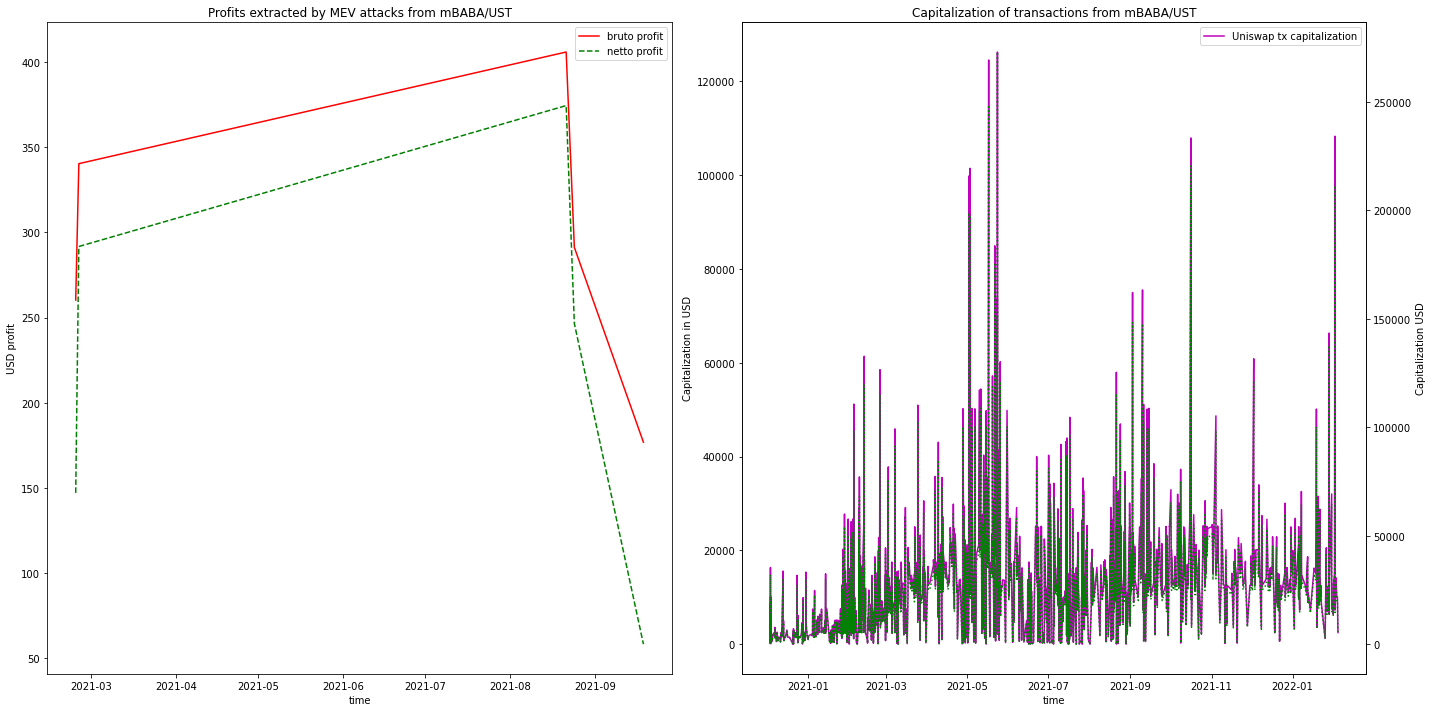

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_mbaba_ust_profits_df['timestamp'],
         grouped_mbaba_ust_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_mbaba_ust_profits_df['timestamp'],
         grouped_mbaba_ust_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from mBABA/UST')
ax1.legend()

ax2_2 = ax2.twinx()
ax2.plot(mbaba_ust_swaps_df['timestamp'],
         mbaba_ust_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2_2.plot(mbaba_ust_swaps_df['timestamp'],
         mbaba_ust_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2_2.set_ylabel('Capitalization USD')
ax2.set_title('Capitalization of transactions from mBABA/UST')
ax2.legend()

plt.tight_layout()
plt.show()

## mAAPL/UST

In [104]:
maapl_ust_filtered_swaps_df, maapl_ust_mevs_df = maapl_ust_sim.extract_filtered_and_mevs_dfs()
maapl_ust_mevs_df

initial len = 2397, filtered len = 2375
txds = 22
out values = 11


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
827,mAAPL,UST,86.301629,11554.205014,5823.198942,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2d3f2b575877fedb960b42f74574bd7c8987cbceddf2...,142999999999,500000
828,UST,mAAPL,11373.165844,86.301629,5731.957086,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x630ce9f1a12987bdd100c6a61beb383887df6b6e839e...,143000000001,500000
872,UST,mAAPL,12315.508898,88.755828,6204.222476,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x41c220bf2faadc8fa79934556a2a0b2acc18f1eb9c6d...,110010000000,500000
873,mAAPL,UST,88.755828,12429.211746,6261.502916,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf8a71c4ba3dc5fa9187e6a4a4a819f588b3d2a486ae2...,109999999999,500000
1091,UST,mAAPL,34663.725409,281.351228,17531.258969,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x27e250ebc497732ea5bb514e9e6f6a116094e9924a67...,193010000000,500000
1092,mAAPL,UST,281.351228,35459.877062,17933.914502,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6489baa2a707b301cb9b581d6fb925562d1a79761da7...,192999990000,500000
1105,mAAPL,UST,269.145956,33938.693093,16931.693256,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5a863d20ef3938e26eb646c53c1331ef520246cfe319...,144999990000,500000
1107,UST,mAAPL,33644.270372,269.145956,16784.808543,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf402550388f469f7e3b7b2b0f9dc0f152d36e9ae217e...,145010000000,500000
1319,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,6000000
1320,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,500000


In [105]:
maapl_ust_mevs_df = maapl_ust_sim.calculate_attack_profit(maapl_ust_mevs_df)
maapl_ust_mevs_df = maapl_ust_sim.calculate_attack_profit_by_token(maapl_ust_mevs_df)

In [106]:
maapl_price_df = maapl_ust_sim.get_daily_token_price(first_to_second=True, token_name='mAAPL')
maapl_price_df['date'] = maapl_price_df['date'].dt.strftime("%Y-%m-%d")
maapl_price_df

,date,mAAPL_price
0,2020-12-03,124.443578
1,2020-12-04,124.527912
2,2020-12-05,126.515202
3,2020-12-06,133.484036
4,2020-12-07,123.211560
...,...,...
392,2022-01-30,168.396062
393,2022-01-31,171.342292
394,2022-02-01,172.909964
395,2022-02-03,172.475637


In [107]:
maapl_ust_mevs_df['date'] = maapl_ust_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
maapl_ust_mevs_df = pd.merge(maapl_ust_mevs_df, maapl_price_df, on='date', how='left')
maapl_ust_mevs_df = pd.merge(maapl_ust_mevs_df, weth_price_df, on='date', how='left')
maapl_ust_mevs_df = pd.merge(maapl_ust_mevs_df, sto_pools_mevs_df, on='txd', how='left')

### Brutto/netto profit calculation

In [108]:
maapl_ust_mevs_df['bruto_maapl_to_ust_profit'] = maapl_ust_mevs_df['mAAPL_profit'] * maapl_ust_mevs_df['mAAPL_price']
maapl_ust_mevs_df['bruto_total_profit'] = maapl_ust_mevs_df['bruto_maapl_to_ust_profit'] + maapl_ust_mevs_df['UST_profit']
maapl_ust_mevs_df.loc[maapl_ust_mevs_df['tx_fee'] >= 1, 'tx_fee'] = maapl_ust_mevs_df['tx_fee'].median()
maapl_ust_mevs_df.loc[maapl_ust_mevs_df['tx_fee'] == 0, 'tx_fee'] = maapl_ust_mevs_df['tx_fee'].median()
maapl_ust_mevs_df['gas_costs_usd'] = (maapl_ust_mevs_df['tx_fee'] * maapl_ust_mevs_df['WETH_price'] *
                                      maapl_ust_mevs_df['gas_usage_by_tx'])
maapl_ust_mevs_df['netto_profit'] = maapl_ust_mevs_df['bruto_total_profit'] - maapl_ust_mevs_df['gas_costs_usd']
maapl_ust_mevs_df.dropna(inplace=True)
maapl_ust_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAAPL,UST,86.301629,11554.205014,5823.198942,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2d3f2b575877fedb960b42f74574bd7c8987cbceddf2...,142999999999,...,1932.458316,11882518.0,96.0,115300.0,1939.61,1.430000e-07,0.0,181.039170,31.862179,149.176991
1,UST,mAAPL,11373.165844,86.301629,5731.957086,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x630ce9f1a12987bdd100c6a61beb383887df6b6e839e...,143000000001,...,1932.458316,11882518.0,82.0,137250.0,1939.61,1.430000e-07,0.0,181.039170,37.927876,143.111294
2,UST,mAAPL,12315.508898,88.755828,6204.222476,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x41c220bf2faadc8fa79934556a2a0b2acc18f1eb9c6d...,110010000000,...,1928.106490,11903355.0,83.0,137250.0,1935.14,1.100100e-07,0.0,113.702848,29.112234,84.590614
3,mAAPL,UST,88.755828,12429.211746,6261.502916,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf8a71c4ba3dc5fa9187e6a4a4a819f588b3d2a486ae2...,109999999999,...,1928.106490,11903355.0,87.0,95304.0,1935.14,1.100000e-07,0.0,113.702848,20.213189,93.489659
4,UST,mAAPL,34663.725409,281.351228,17531.258969,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x27e250ebc497732ea5bb514e9e6f6a116094e9924a67...,193010000000,...,1808.538254,12070516.0,221.0,137250.0,1809.76,1.930100e-07,0.0,796.151653,47.909304,748.242349
5,mAAPL,UST,281.351228,35459.877062,17933.914502,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6489baa2a707b301cb9b581d6fb925562d1a79761da7...,192999990000,...,1808.538254,12070516.0,226.0,95304.0,1809.76,1.930000e-07,0.0,796.151653,33.265658,762.885996
6,mAAPL,UST,269.145956,33938.693093,16931.693256,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5a863d20ef3938e26eb646c53c1331ef520246cfe319...,144999990000,...,1665.879480,12097797.0,158.0,95304.0,1668.69,1.450000e-07,0.0,294.422721,23.020920,271.401801
7,UST,mAAPL,33644.270372,269.145956,16784.808543,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf402550388f469f7e3b7b2b0f9dc0f152d36e9ae217e...,145010000000,...,1665.879480,12097797.0,156.0,137250.0,1668.69,1.450100e-07,0.0,294.422721,33.155370,261.267351
8,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,...,3424.525653,12359575.0,2.0,89876.0,3432.21,1.100050e-07,0.0,742.297572,33.857632,708.439939
9,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,...,3424.525653,12359575.0,0.0,114568.0,3432.21,1.100050e-07,0.0,742.297572,43.159478,699.138094


In [109]:
print(len(maapl_ust_mevs_df))
maapl_ust_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)
print(len(maapl_ust_mevs_df))
maapl_ust_mevs_df

20
20


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAAPL,UST,86.301629,11554.205014,5823.198942,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2d3f2b575877fedb960b42f74574bd7c8987cbceddf2...,142999999999,...,1932.458316,11882518.0,96.0,115300.0,1939.61,1.430000e-07,0.0,181.039170,31.862179,149.176991
1,UST,mAAPL,11373.165844,86.301629,5731.957086,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x630ce9f1a12987bdd100c6a61beb383887df6b6e839e...,143000000001,...,1932.458316,11882518.0,82.0,137250.0,1939.61,1.430000e-07,0.0,181.039170,37.927876,143.111294
2,UST,mAAPL,12315.508898,88.755828,6204.222476,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x41c220bf2faadc8fa79934556a2a0b2acc18f1eb9c6d...,110010000000,...,1928.106490,11903355.0,83.0,137250.0,1935.14,1.100100e-07,0.0,113.702848,29.112234,84.590614
3,mAAPL,UST,88.755828,12429.211746,6261.502916,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf8a71c4ba3dc5fa9187e6a4a4a819f588b3d2a486ae2...,109999999999,...,1928.106490,11903355.0,87.0,95304.0,1935.14,1.100000e-07,0.0,113.702848,20.213189,93.489659
4,UST,mAAPL,34663.725409,281.351228,17531.258969,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x27e250ebc497732ea5bb514e9e6f6a116094e9924a67...,193010000000,...,1808.538254,12070516.0,221.0,137250.0,1809.76,1.930100e-07,0.0,796.151653,47.909304,748.242349
5,mAAPL,UST,281.351228,35459.877062,17933.914502,2021-03-19 17:14:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6489baa2a707b301cb9b581d6fb925562d1a79761da7...,192999990000,...,1808.538254,12070516.0,226.0,95304.0,1809.76,1.930000e-07,0.0,796.151653,33.265658,762.885996
6,mAAPL,UST,269.145956,33938.693093,16931.693256,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5a863d20ef3938e26eb646c53c1331ef520246cfe319...,144999990000,...,1665.879480,12097797.0,158.0,95304.0,1668.69,1.450000e-07,0.0,294.422721,23.020920,271.401801
7,UST,mAAPL,33644.270372,269.145956,16784.808543,2021-03-23 22:23:38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf402550388f469f7e3b7b2b0f9dc0f152d36e9ae217e...,145010000000,...,1665.879480,12097797.0,156.0,137250.0,1668.69,1.450100e-07,0.0,294.422721,33.155370,261.267351
8,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,...,3424.525653,12359575.0,2.0,89876.0,3432.21,1.100050e-07,0.0,742.297572,33.857632,708.439939
9,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,...,3424.525653,12359575.0,0.0,114568.0,3432.21,1.100050e-07,0.0,742.297572,43.159478,699.138094


In [110]:
maapl_ust_count_df = maapl_ust_mevs_df.value_counts(subset=['timestamp'])
maapl_ust_count_df[maapl_ust_count_df.values > 2]

Series([], dtype: int64)

In [111]:
grouped_maapl_ust_profits_df = maapl_ust_mevs_df.groupby(by=['timestamp']).sum()
grouped_maapl_ust_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_maapl_ust_profits_df['block'] = grouped_maapl_ust_profits_df['block'] / 2
grouped_maapl_ust_profits_df['bruto_total_profit'] = grouped_maapl_ust_profits_df['bruto_total_profit']/2
grouped_maapl_ust_profits_df['netto_profit'] = (grouped_maapl_ust_profits_df['bruto_total_profit'] -
                                               grouped_maapl_ust_profits_df['gas_costs_usd'])
grouped_maapl_ust_profits_df.reset_index(inplace=True)

print(fr"max brutto profit {grouped_maapl_ust_profits_df['bruto_total_profit'].max()}")
print(fr"min brutto profit {grouped_maapl_ust_profits_df['bruto_total_profit'].min()}")
print(fr"max netto profit {grouped_maapl_ust_profits_df['netto_profit'].max()}")
print(fr"min netto profit {grouped_maapl_ust_profits_df['netto_profit'].min()}")
print(fr"zero bruto profit transactions = {len(maapl_ust_mevs_df[maapl_ust_mevs_df['bruto_total_profit'] == 0])}")
print(fr"transactions with losses = {len(maapl_ust_mevs_df[maapl_ust_mevs_df['netto_profit'] < 0])}")

max brutto profit 796.1516533476315
min brutto profit 113.70284755746798
max netto profit 714.9766914654837
min netto profit 64.3774248183046
zero bruto profit transactions = 0
transactions with losses = 0


In [112]:
print(fr"sum of paid gas = {sum(maapl_ust_mevs_df['gas_costs_usd'])}")
print(fr"sum of brutto profits = {sum(maapl_ust_mevs_df['bruto_total_profit'] / 2)}")
print(fr"sum of netto profits = {sum(maapl_ust_mevs_df['bruto_total_profit'] / 2) - sum(maapl_ust_mevs_df['gas_costs_usd'])}")

sum of paid gas = 817.5594213492508
sum of brutto profits = 4154.642070313037
sum of netto profits = 3337.082648963786


### Brutto profit to Uniswap capitalization coefficient

In [113]:
print("brutto attacks profits (" + str(sum(maapl_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mAAPL/UST Uniswap capitalization (" + str(maapl_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(maapl_ust_mevs_df['bruto_total_profit'] / 2) / maapl_ust_swaps_df['amount_usd'].sum()))

brutto attacks profits (4154.642070313037) to mAAPL/UST Uniswap capitalization (29363467.450049955) coef is equal to 0.0001414901723504037


### Brutto profit to custom capitalization coefficient

It is important to perform manual check of the first token value and second token value, considering that it is not possible to set correct token name from the start and requiring manual check of values

In [114]:
maapl_ust_swaps_df = maapl_ust_sim.calculate_attack_profit_by_token(maapl_ust_swaps_df)
maapl_ust_swaps_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mAAPL_profit
0,UST,mAAPL,297.072343,2.404518,149.249384,2020-12-03 17:54:40,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x8f70b3ac45a6896532fb90b992d5b7827ba88d3c,0x5c450e4f9908aa58814be20fc50d60b03c3798f99af7...,58000000000,178261,297.072343,2.404518,0.0,0.0
1,UST,mAAPL,1000.000000,8.060584,531.155662,2020-12-03 19:25:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x55e1490a1878d0b61811726e2cb96560022e764c,0x5cc783f79cdab6a966cc9de5d69215dd4199c1f367af...,57000000000,184711,1000.000000,8.060584,0.0,0.0
2,UST,mAAPL,1000.000000,8.009403,529.764717,2020-12-03 19:50:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc5cee9416571752528acbb4331761c5e2706748c,0x0d5279feeb6c1536f2f8ee5efda3901352e6697fb84a...,36000000000,144711,1000.000000,8.009403,0.0,0.0
3,UST,mAAPL,10000.000000,77.390496,5504.266915,2020-12-03 19:51:07,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x36d2269af2b297ca11b1c61e8a3baf140b177ea1,0x339975916e81727fbf0060810da871921ca5aecb85aa...,100000000000,144738,10000.000000,77.390496,0.0,0.0
4,UST,mAAPL,5000.000000,36.938175,2752.007649,2020-12-03 19:52:27,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x55e1490a1878d0b61811726e2cb96560022e764c,0xd2ad1e3793ea315c70b1bd90999caffbe498eb5aefab...,101000000000,174738,5000.000000,36.938175,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,UST,mAAPL,20050.337232,116.138846,9952.827381,2022-02-01 05:34:50,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe8a31d203baa1837a3e88ead9517f88639c7ffb7,0x90f8e328d993be6a237d3aafe5d6327631ec78e70f23...,139149597976,250000,20050.337232,116.138846,0.0,0.0
2393,mAAPL,UST,422.342920,71616.774897,35798.779058,2022-02-03 09:36:36,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x0ebac44fca2453616da415c0be23529920fb8223,0x344f5d5b6fdea07de2fd283c734680f897937635d5ad...,71648322495,162505,71616.774897,422.342920,0.0,0.0
2394,UST,mAAPL,29247.996594,173.137842,14620.470800,2022-02-03 09:36:45,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe8a31d203baa1837a3e88ead9517f88639c7ffb7,0xb2cdf40351812db71ed8093a0eec2854a72e435fb648...,161600000000,250000,29247.996594,173.137842,0.0,0.0
2395,UST,mAAPL,17500.000000,102.482191,8746.200660,2022-02-03 09:37:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9fb7e5f71517c9b0059e3200b51bbd1477db333b,0x05c44b40cb1c81de52688dccbb84eb3c245ff619e5bb...,147600000000,250000,17500.000000,102.482191,0.0,0.0


In [115]:
maapl_price_df = maapl_ust_sim.get_daily_token_price(first_to_second=True, token_name='mAAPL')
maapl_price_df['date'] = maapl_price_df['date'].dt.strftime("%Y-%m-%d")
maapl_price_df

,date,mAAPL_price
0,2020-12-03,124.443578
1,2020-12-04,124.527912
2,2020-12-05,126.515202
3,2020-12-06,133.484036
4,2020-12-07,123.211560
...,...,...
392,2022-01-30,168.396062
393,2022-01-31,171.342292
394,2022-02-01,172.909964
395,2022-02-03,172.475637


In [116]:
maapl_ust_swaps_df['date'] = maapl_ust_swaps_df['timestamp'].dt.strftime("%Y-%m-%d")
maapl_ust_swaps_df = pd.merge(maapl_ust_swaps_df, maapl_price_df, on='date', how='left')
maapl_ust_swaps_df = pd.merge(maapl_ust_swaps_df, weth_price_df, on='date', how='left')
maapl_ust_swaps_df['cap_maapl_to_ust'] = maapl_ust_swaps_df['second_token_value'] * maapl_ust_swaps_df['mAAPL_price']
maapl_ust_swaps_df['total_cap'] = maapl_ust_swaps_df['cap_maapl_to_ust'] + maapl_ust_swaps_df['first_token_value']

In [117]:
print("brutto attacks profits (" + str(sum(maapl_ust_mevs_df['bruto_total_profit'] / 2)) +
      ") to mAAPL/UST custom capitalization (" + str(maapl_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(maapl_ust_mevs_df['bruto_total_profit'] / 2) / maapl_ust_swaps_df['total_cap'].sum() / 2))

brutto attacks profits (4154.642070313037) to mAAPL/UST custom capitalization (58602535.4641359) coef is equal to 1.7723815349489578e-05


### Netto profit to Uniswap capitalization coefficient

In [118]:
print("netto attacks profits (" + str(sum(maapl_ust_mevs_df['netto_profit'] / 2)) +
      ") to mAAPL/UST Uniswap capitalization (" + str(maapl_ust_swaps_df['amount_usd'].sum()) +
      ") coef is equal to " + str(sum(maapl_ust_mevs_df['netto_profit'] / 2) / maapl_ust_swaps_df['amount_usd'].sum()))

netto attacks profits (3745.8623596384114) to mAAPL/UST Uniswap capitalization (29363467.450049955) coef is equal to 0.0001275688018116552


### Netto profit to custom capitalization coefficient

In [119]:
print("netto attacks profits (" + str(sum(maapl_ust_mevs_df['netto_profit'] / 2)) +
      ") to mAAPL/UST custom capitalization (" + str(maapl_ust_swaps_df['total_cap'].sum() / 2) +
      ") coef is equal to " + str(sum(maapl_ust_mevs_df['netto_profit'] / 2) / maapl_ust_swaps_df['total_cap'].sum() / 2))

netto attacks profits (3745.8623596384114) to mAAPL/UST custom capitalization (58602535.4641359) coef is equal to 1.597995005664404e-05


### MEV transactions frequency to standard transactions

MEVs frequency is extremely small and can be seen that there is almost no MEV activity registered in such a big pool

In [120]:
print("mAAPL/UST pool contains " + str(len(maapl_ust_mevs_df) / 2) + " MEV attacks (or " +
      str(len(maapl_ust_mevs_df)) + " MEV transactions) out of " + str(len(maapl_ust_swaps_df)) +
      " total transactions." +
      "\nCoefficient of MEV attacks = " + str((len(maapl_ust_mevs_df) / 2) / len(maapl_ust_swaps_df)) +
      "; coefficient of MEV transactions = " + str(len(maapl_ust_mevs_df) / len(maapl_ust_swaps_df)) +
      "\nCoef of MEV attacks cap = " + str(maapl_ust_mevs_df['amount_usd'].sum() / maapl_ust_swaps_df['amount_usd'].sum()))

mAAPL/UST pool contains 10.0 MEV attacks (or 20 MEV transactions) out of 2397 total transactions.
Coefficient of MEV attacks = 0.004171881518564873; coefficient of MEV transactions = 0.008343763037129746
Coef of MEV attacks cap = 0.010093515593144066


### Distributions of profits and capitalizations

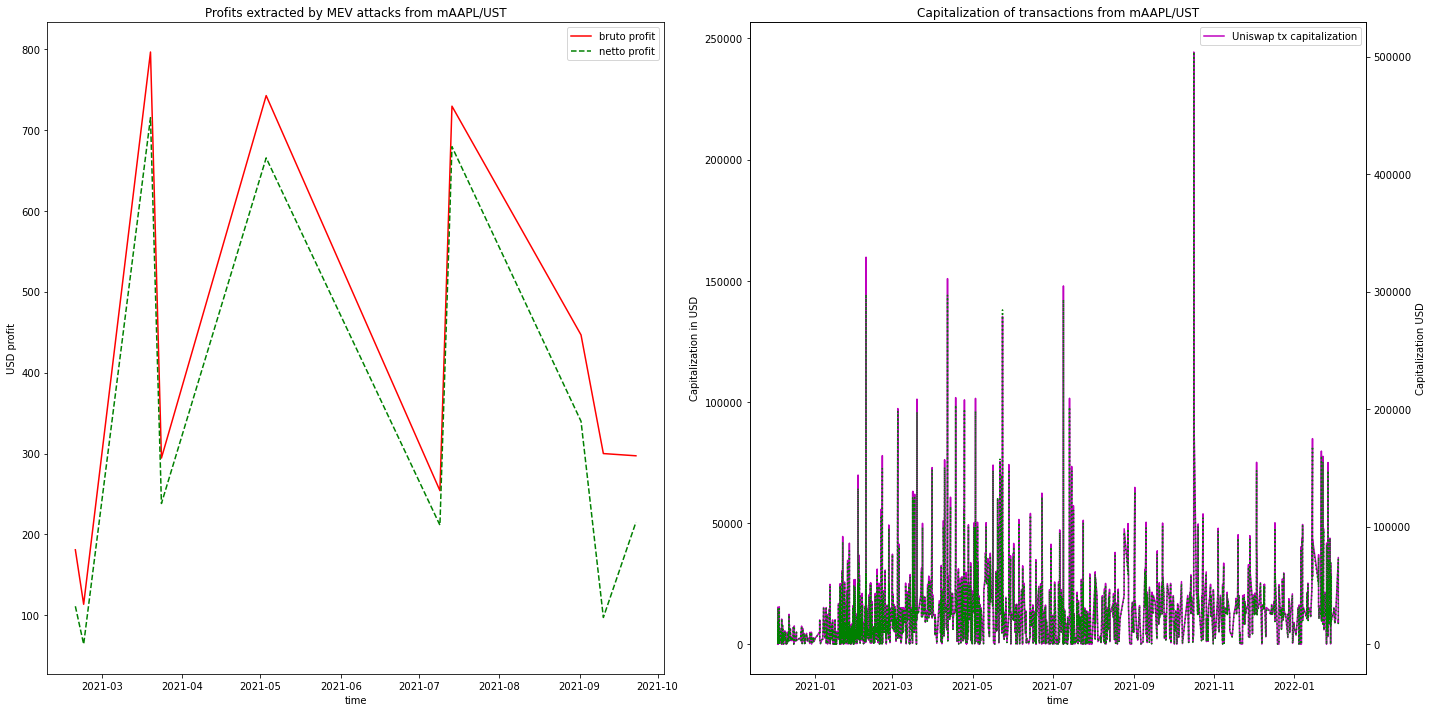

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(grouped_maapl_ust_profits_df['timestamp'],
         grouped_maapl_ust_profits_df['bruto_total_profit'], label='bruto profit', color='r')
ax1.plot(grouped_maapl_ust_profits_df['timestamp'],
         grouped_maapl_ust_profits_df['netto_profit'], label='netto profit', color='g', linestyle='--')
ax1.set_xlabel('time')
ax1.set_ylabel('USD profit')
ax1.set_title('Profits extracted by MEV attacks from mAAPL/UST')
ax1.legend()

ax2_2 = ax2.twinx()
ax2.plot(maapl_ust_swaps_df['timestamp'],
         maapl_ust_swaps_df['amount_usd'], label="Uniswap tx capitalization", color='m')
ax2_2.plot(maapl_ust_swaps_df['timestamp'],
         maapl_ust_swaps_df['total_cap'] / 2, label="custom tx capitalization", color='g',
         linestyle=':')
ax2.set_xlabel('time')
ax2.set_ylabel('Capitalization in USD')
ax2_2.set_ylabel('Capitalization USD')
ax2.set_title('Capitalization of transactions from mAAPL/UST')
ax2.legend()

plt.tight_layout()
plt.show()

# Collecting all profits into one big history file

In [122]:
chosen_columns = ['timestamp', 'sender', 'to', 'txd', 'block', 'block_position', 'bruto_total_profit', 'amount_usd',
                  'tx_fee', 'gas_usage_by_tx', 'gas_costs_usd','netto_profit']

perl_weth_profits_df = perl_weth_mevs_df[chosen_columns]
bpt_weth_profits_df = bpt_weth_mevs_df[chosen_columns]
mamzn_ust_profits_df = mamzn_ust_mevs_df[chosen_columns]
mbaba_ust_profits_df = mbaba_ust_mevs_df[chosen_columns]
maapl_ust_profits_df = maapl_ust_mevs_df[chosen_columns]

perl_weth_profits_df['pool_name'] = 'PERL/WETH'
bpt_weth_profits_df['pool_name'] = 'BPT/WETH'
mamzn_ust_profits_df['pool_name'] = 'mAMZN/UST'
mbaba_ust_profits_df['pool_name'] = 'mBABA/UST'
maapl_ust_profits_df['pool_name'] = 'mAAPL/UST'

non_shares_sto_profits_list = [perl_weth_profits_df, bpt_weth_profits_df]
shares_sto_profits_list = [mamzn_ust_profits_df, mbaba_ust_profits_df, maapl_ust_profits_df]
sto_profits_list = [perl_weth_profits_df, bpt_weth_profits_df,
                    mamzn_ust_profits_df, mbaba_ust_profits_df, maapl_ust_profits_df]
non_shares_sto_profits_df = pd.concat(non_shares_sto_profits_list)
shares_sto_profits_df = pd.concat(shares_sto_profits_list)
sto_profits_df = pd.concat(sto_profits_list)

<ipython-input-122-07deaec4a6b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perl_weth_profits_df['pool_name'] = 'PERL/WETH'
<ipython-input-122-07deaec4a6b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpt_weth_profits_df['pool_name'] = 'BPT/WETH'
<ipython-input-122-07deaec4a6b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [123]:
sto_profits_df

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,amount_usd,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124.0,3.0,128.531868,547.509240,1.000000e-09,103352.0,0.189671,128.342197,PERL/WETH
1,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124.0,0.0,128.531868,419.196402,1.000000e-09,126727.0,0.232569,128.299299,PERL/WETH
2,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368.0,2.0,66.618935,388.215979,4.490191e-08,76866.0,9.357660,57.261275,PERL/WETH
3,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368.0,0.0,66.618935,324.187423,4.490191e-08,109491.0,13.329424,53.289510,PERL/WETH
4,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859.0,3.0,4.358010,86.271375,4.490191e-08,110550.0,10.783604,-6.425594,PERL/WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2021-09-01 12:21:47,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xea8f4f671ec9784a62e36cf15113091365e2611f33d6...,13139769.0,2.0,446.546544,17095.473356,9.504744e-08,126606.0,46.011706,400.534838,mAAPL/UST
16,2021-09-10 02:50:05,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x9707f5b3f352300969a18fdd3a0972ad4296c554fed4...,13195419.0,0.0,299.945092,16707.395406,7.934970e-08,188420.0,47.990612,251.954480,mAAPL/UST
17,2021-09-10 02:50:05,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xac506b1c9965a5022bc458bbc35778faa0cac8560c00...,13195419.0,2.0,299.945092,16858.423938,3.065337e-07,157072.0,154.547174,145.397918,mAAPL/UST
18,2021-09-22 15:54:47,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xb8060c01120fe8988c1cd31796e24248eed0306c148a...,13276476.0,2.0,297.188884,16818.081311,8.065567e-08,167540.0,41.458476,255.730407,mAAPL/UST


In [124]:
shares_sto_profits_df

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,amount_usd,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x514a2d8c72567cd6688076d501893e39f762d99973cf...,11854877.0,130.0,254.103086,24895.476690,1.099900e-07,110222.0,21.935563,232.167522,mAMZN/UST
1,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a0652...,11854877.0,128.0,254.103086,24768.575330,1.099900e-07,122308.0,24.340829,229.762256,mAMZN/UST
2,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5acce74583f62f5354803c1ea3a0321471acd2f64e69...,11917264.0,147.0,659.360116,27634.471311,2.100000e-07,110222.0,37.516103,621.844013,mAMZN/UST
3,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x7a3435524e97f3b6098c513c819669c275f1b119d7ae...,11917264.0,144.0,659.360116,27302.584966,2.100100e-07,122308.0,41.631780,617.728336,mAMZN/UST
4,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x3c58c9fb6d5e3c4066f756dc6b8c4d71de1c4b605469...,11953307.0,112.0,207.475856,7659.169739,1.650000e-07,110222.0,28.501493,178.974363,mAMZN/UST
5,2021-03-01 16:05:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xbbb8dfdce21dde62716dab903598add6a0dd4a0ac51c...,11953307.0,78.0,207.475856,7539.931667,1.650100e-07,122308.0,31.628641,175.847215,mAMZN/UST
6,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x63ed80e1fc096b303d61a8e7b507488104aa2aeb5843...,11957017.0,150.0,907.801226,45247.950796,1.190100e-07,122320.0,21.718882,886.082344,mAMZN/UST
7,2021-03-02 05:50:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xae29541526cc1a7eeff9d23d79681b9bcbbcf2d6ce4e...,11957017.0,166.0,907.801226,45703.843416,1.190000e-07,110234.0,19.571271,888.229955,mAMZN/UST
8,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x0da5b4a877cd45dc022a482288518afd41d1472404a3...,12029082.0,142.0,356.063540,11895.520297,1.080000e-07,110222.0,22.933413,333.130127,mAMZN/UST
9,2021-03-13 08:24:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x69dd2ea2b0503619e4b5965639a565483a61f6c3b772...,12029082.0,137.0,356.063540,11719.442850,1.080100e-07,122308.0,25.450453,330.613087,mAMZN/UST


## Non-shares STO analysis and save

In [125]:
non_shares_sto_profits_df.sort_values(by=['timestamp'], inplace=True)
non_shares_sto_profits_df = non_shares_sto_profits_df.reset_index()
non_shares_sto_profits_df.drop(columns=['index'])

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,amount_usd,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,10245241,65,4.291813,40.142597,5.600000e-08,125262,1.618942,2.672871,BPT/WETH
1,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,10245241,120,4.291813,44.610802,5.600000e-08,103374,1.336052,2.955761,BPT/WETH
2,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,10248437,296,6.837202,86.626010,3.000000e-08,87540,0.624675,6.212528,BPT/WETH
3,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,10248437,8,6.837202,80.114740,4.750000e-08,99024,1.118820,5.718383,BPT/WETH
4,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,10251014,38,6.518840,94.380749,4.800000e-08,125274,1.430303,5.088536,BPT/WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-08-29 08:54:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xfd687f6a1e0ead8abee8d7d719dda5dd338893a06881...,13119424,1,53.358970,2198.684384,5.373985e-08,109143,18.964492,34.394478,PERL/WETH
76,2021-09-04 18:03:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x3931b57b3b6c64e60a544c45999e9292f681dd151c8c...,13160741,2,488.918520,24648.304231,1.237054e-06,82931,398.580177,90.338343,PERL/WETH
77,2021-09-04 18:03:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xeced0afc163e25d502c0f54273227775aaf7b11d3a56...,13160741,0,488.918520,24160.705959,1.173117e-07,91375,41.646536,447.271984,PERL/WETH
78,2021-10-09 12:22:48,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x7a3036b78041bcbb07666996746d631607994a10017e...,13384508,5,126.178133,3735.982379,3.297323e-07,80641,95.190359,30.987775,PERL/WETH


In [126]:
grouped_non_shares_sto_profits_df = non_shares_sto_profits_df.value_counts(subset=['timestamp'])
grouped_non_shares_sto_profits_df[grouped_non_shares_sto_profits_df.values > 2]

Series([], dtype: int64)

In [127]:
timestamp_grouped_non_shares_sto_profits_df = non_shares_sto_profits_df.groupby(by=['timestamp']).sum()
timestamp_grouped_non_shares_sto_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
timestamp_grouped_non_shares_sto_profits_df['block'] = timestamp_grouped_non_shares_sto_profits_df['block'] / 2
timestamp_grouped_non_shares_sto_profits_df['bruto_total_profit']= (timestamp_grouped_non_shares_sto_profits_df['bruto_total_profit'] /
                                                                  2)
timestamp_grouped_non_shares_sto_profits_df['netto_profit'] = timestamp_grouped_non_shares_sto_profits_df['bruto_total_profit'] - timestamp_grouped_non_shares_sto_profits_df['gas_costs_usd']
timestamp_grouped_non_shares_sto_profits_df.reset_index(inplace=True)
timestamp_grouped_non_shares_sto_profits_df

,timestamp,index,block,bruto_total_profit,amount_usd,gas_usage_by_tx,gas_costs_usd,netto_profit
0,2020-06-11 15:41:28,1,10245241.0,4.291813,84.753399,228636,2.954994,1.336819
1,2020-06-12 03:27:40,5,10248437.0,6.837202,166.740751,186564,1.743494,5.093708
2,2020-06-12 13:00:42,9,10251014.0,6.518840,195.068015,228672,2.610840,3.908000
3,2020-06-13 07:47:30,13,10256065.0,4.193796,126.871075,228648,1.309007,2.884789
4,2020-06-13 14:23:54,17,10257857.0,51.508680,1330.983982,186570,2.482341,49.026339
5,2020-06-15 06:33:37,21,10268720.0,11.239664,218.333820,228672,3.021977,8.217686
6,2020-06-16 21:47:08,25,10279298.0,12.867790,478.730277,186547,2.081467,10.786323
7,2020-06-16 21:53:21,29,10279326.0,3.817102,318.939868,228672,1.364988,2.452114
8,2020-06-17 11:58:16,33,10283116.0,7.080246,339.232642,228672,2.181843,4.898402
9,2020-06-18 00:25:26,37,10286421.0,4.828277,176.589191,228648,1.540005,3.288272


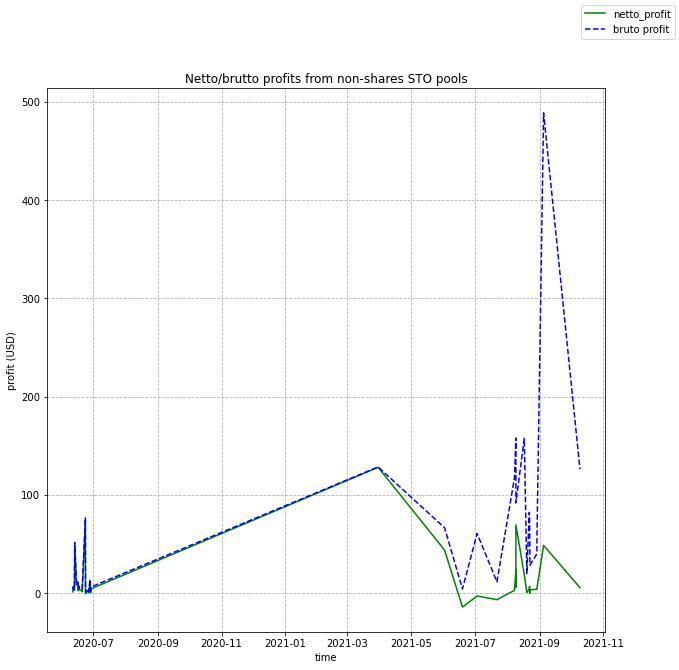

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(timestamp_grouped_non_shares_sto_profits_df['timestamp'], timestamp_grouped_non_shares_sto_profits_df['netto_profit'],
        label='netto_profit', color='g')
ax.plot(timestamp_grouped_non_shares_sto_profits_df['timestamp'], timestamp_grouped_non_shares_sto_profits_df['bruto_total_profit'],
        color='b', linestyle='--', label='bruto profit')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto/brutto profits from non-shares STO pools')
fig.legend()
plt.show()

In [129]:
print(fr"total non-shares STO netto = {sum(timestamp_grouped_non_shares_sto_profits_df['netto_profit'])}")
print(fr"total non-shares STO brutto = {sum(timestamp_grouped_non_shares_sto_profits_df['bruto_total_profit'])}")
print(fr"total non-shares STO gas spendings in USD = {sum(timestamp_grouped_non_shares_sto_profits_df['gas_costs_usd'])}")

total non-shares STO netto = 542.9564051658332
total non-shares STO brutto = 2119.118605119545
total non-shares STO gas spendings in USD = 1576.162199953712


In [130]:
non_shares_sto_profits_df.to_csv('non_shares_sto_exact_mevs_profits_df.csv')
timestamp_grouped_non_shares_sto_profits_df.to_csv('timestamp_grouped_non_shares_sto_exact_mevs_profits_df.csv')

## Shares sto analysis and save

In [131]:
shares_sto_profits_df.sort_values(by=['timestamp'], inplace=True)
shares_sto_profits_df = shares_sto_profits_df.reset_index()
shares_sto_profits_df.drop(columns=['index'])

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,amount_usd,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x514a2d8c72567cd6688076d501893e39f762d99973cf...,11854877.0,130.0,254.103086,24895.476690,1.099900e-07,110222.0,21.935563,232.167522,mAMZN/UST
1,2021-02-14 12:41:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a0652...,11854877.0,128.0,254.103086,24768.575330,1.099900e-07,122308.0,24.340829,229.762256,mAMZN/UST
2,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x630ce9f1a12987bdd100c6a61beb383887df6b6e839e...,11882518.0,82.0,181.039170,5731.957086,1.430000e-07,137250.0,37.927876,143.111294,mAAPL/UST
3,2021-02-18 18:46:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x2d3f2b575877fedb960b42f74574bd7c8987cbceddf2...,11882518.0,96.0,181.039170,5823.198942,1.430000e-07,115300.0,31.862179,149.176991,mAAPL/UST
4,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xf8a71c4ba3dc5fa9187e6a4a4a819f588b3d2a486ae2...,11903355.0,87.0,113.702848,6261.502916,1.100000e-07,95304.0,20.213189,93.489659,mAAPL/UST
5,2021-02-21 23:32:43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x41c220bf2faadc8fa79934556a2a0b2acc18f1eb9c6d...,11903355.0,83.0,113.702848,6204.222476,1.100100e-07,137250.0,29.112234,84.590614,mAAPL/UST
6,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xaeecbc1aa0c9dab3c9346fb5f83cb70969ae34018e7c...,11911661.0,103.0,260.273872,10934.406402,2.850100e-07,137308.0,61.547550,198.726322,mBABA/UST
7,2021-02-23 06:30:23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x56a5453e5439565bc4e935ae8983e06404542efbb0e5...,11911661.0,105.0,260.273872,11065.461861,2.850000e-07,115230.0,51.649396,208.624476,mBABA/UST
8,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x5acce74583f62f5354803c1ea3a0321471acd2f64e69...,11917264.0,147.0,659.360116,27634.471311,2.100000e-07,110222.0,37.516103,621.844013,mAMZN/UST
9,2021-02-24 02:54:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x7a3435524e97f3b6098c513c819669c275f1b119d7ae...,11917264.0,144.0,659.360116,27302.584966,2.100100e-07,122308.0,41.631780,617.728336,mAMZN/UST


In [132]:
grouped_shares_sto_profits_df = shares_sto_profits_df.value_counts(subset=['timestamp'])
grouped_shares_sto_profits_df[grouped_shares_sto_profits_df.values > 2]

Series([], dtype: int64)

In [133]:
timestamp_grouped_shares_sto_profits_df = shares_sto_profits_df.groupby(by=['timestamp']).sum()
timestamp_grouped_shares_sto_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
timestamp_grouped_shares_sto_profits_df['block'] = timestamp_grouped_shares_sto_profits_df['block'] / 2
timestamp_grouped_shares_sto_profits_df['bruto_total_profit']= (timestamp_grouped_shares_sto_profits_df['bruto_total_profit'] /
                                                                  2)
timestamp_grouped_shares_sto_profits_df['netto_profit'] = timestamp_grouped_shares_sto_profits_df['bruto_total_profit'] - timestamp_grouped_shares_sto_profits_df['gas_costs_usd']
timestamp_grouped_shares_sto_profits_df.reset_index(inplace=True)
timestamp_grouped_shares_sto_profits_df

,timestamp,index,block,bruto_total_profit,amount_usd,gas_usage_by_tx,gas_costs_usd,netto_profit
0,2021-02-14 12:41:49,1,11854877.0,254.103086,49664.052020,232530.0,46.276392,207.826693
1,2021-02-18 18:46:02,1,11882518.0,181.039170,11555.156028,252550.0,69.790056,111.249115
2,2021-02-21 23:32:43,5,11903355.0,113.702848,12465.725392,232554.0,49.325423,64.377425
3,2021-02-23 06:30:23,1,11911661.0,260.273872,21999.868263,252538.0,113.196946,147.076926
4,2021-02-24 02:54:08,5,11917264.0,659.360116,54937.056277,232530.0,79.147883,580.212233
5,2021-02-24 09:52:04,5,11919112.0,340.306773,116901.685973,232554.0,48.625440,291.681334
6,2021-03-01 16:05:06,9,11953307.0,207.475856,15199.101405,232530.0,60.130134,147.345722
7,2021-03-02 05:50:54,13,11957017.0,907.801226,90951.794211,232554.0,41.290153,866.511073
8,2021-03-13 08:24:10,17,12029082.0,356.063540,23614.963147,232530.0,48.383866,307.679674
9,2021-03-19 17:09:34,21,12070487.0,815.807061,31875.943678,232530.0,81.586854,734.220207


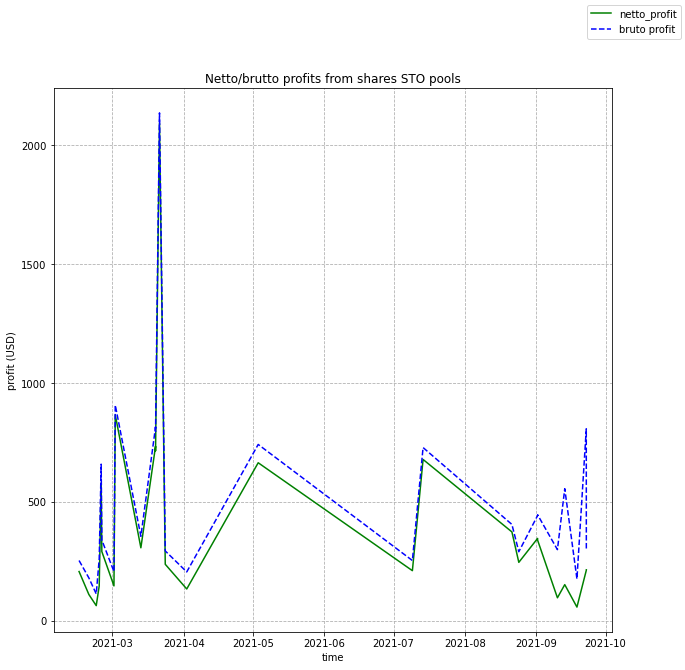

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(timestamp_grouped_shares_sto_profits_df['timestamp'], timestamp_grouped_shares_sto_profits_df['netto_profit'],
        label='netto_profit', color='g')
ax.plot(timestamp_grouped_shares_sto_profits_df['timestamp'], timestamp_grouped_shares_sto_profits_df['bruto_total_profit'],
        color='b', linestyle='--', label='bruto profit')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto/brutto profits from shares STO pools')
fig.legend()
plt.show()

In [135]:
print(fr"total shares STO netto = {sum(timestamp_grouped_shares_sto_profits_df['netto_profit'])}")
print(fr"total shares STO brutto = {sum(timestamp_grouped_shares_sto_profits_df['bruto_total_profit'])}")
print(fr"total shares STO gas spendings in USD = {sum(timestamp_grouped_shares_sto_profits_df['gas_costs_usd'])}")

total shares STO netto = 10238.833968273342
total shares STO brutto = 12979.943914866135
total shares STO gas spendings in USD = 2741.1099465927914


In [136]:
shares_sto_profits_df.to_csv('shares_sto_exact_mevs_profits_df.csv')
timestamp_grouped_shares_sto_profits_df.to_csv('timestamp_grouped_shares_sto_exact_mevs_profits_df.csv')

## Total STO profits

In [137]:
sto_profits_df.sort_values(by=['timestamp'], inplace=True)
sto_profits_df = sto_profits_df.reset_index()
sto_profits_df.drop(columns=['index'])

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,amount_usd,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,10245241.0,65.0,4.291813,40.142597,5.600000e-08,125262.0,1.618942,2.672871,BPT/WETH
1,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,10245241.0,120.0,4.291813,44.610802,5.600000e-08,103374.0,1.336052,2.955761,BPT/WETH
2,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,10248437.0,8.0,6.837202,80.114740,4.750000e-08,99024.0,1.118820,5.718383,BPT/WETH
3,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,10248437.0,296.0,6.837202,86.626010,3.000000e-08,87540.0,0.624675,6.212528,BPT/WETH
4,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,10251014.0,38.0,6.518840,94.380749,4.800000e-08,125274.0,1.430303,5.088536,BPT/WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2021-09-22 15:19:38,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x480c1c7fc02828ebab672e47d32c33d88bfe6bc02de4...,13276318.0,2.0,807.987030,16683.826969,1.175795e-06,156206.0,563.493932,244.493097,mAMZN/UST
128,2021-09-22 15:54:47,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xc208ef8df6ea408aff3cf53d60597491a2a4423fb36c...,13276476.0,4.0,297.188884,16966.716473,8.065567e-08,163987.0,40.579272,256.609612,mAAPL/UST
129,2021-09-22 15:54:47,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xb8060c01120fe8988c1cd31796e24248eed0306c148a...,13276476.0,2.0,297.188884,16818.081311,8.065567e-08,167540.0,41.458476,255.730407,mAAPL/UST
130,2021-10-09 12:22:48,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x7a3036b78041bcbb07666996746d631607994a10017e...,13384508.0,5.0,126.178133,3735.982379,3.297323e-07,80641.0,95.190359,30.987775,PERL/WETH


In [138]:
timestamp_grouped_sto_profits_df = sto_profits_df.groupby(by=['timestamp']).sum()
timestamp_grouped_sto_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
timestamp_grouped_sto_profits_df['block'] = timestamp_grouped_sto_profits_df['block'] / 2
timestamp_grouped_sto_profits_df['bruto_total_profit']= (timestamp_grouped_sto_profits_df['bruto_total_profit'] /
                                                                2)
timestamp_grouped_sto_profits_df['netto_profit'] = timestamp_grouped_sto_profits_df['bruto_total_profit'] - timestamp_grouped_sto_profits_df['gas_costs_usd']
timestamp_grouped_sto_profits_df.reset_index(inplace=True)
timestamp_grouped_sto_profits_df

,timestamp,index,block,bruto_total_profit,amount_usd,gas_usage_by_tx,gas_costs_usd,netto_profit
0,2020-06-11 15:41:28,1,10245241.0,4.291813,84.753399,228636.0,2.954994,1.336819
1,2020-06-12 03:27:40,5,10248437.0,6.837202,166.740751,186564.0,1.743494,5.093708
2,2020-06-12 13:00:42,9,10251014.0,6.518840,195.068015,228672.0,2.610840,3.908000
3,2020-06-13 07:47:30,13,10256065.0,4.193796,126.871075,228648.0,1.309007,2.884789
4,2020-06-13 14:23:54,17,10257857.0,51.508680,1330.983982,186570.0,2.482341,49.026339
...,...,...,...,...,...,...,...,...
61,2021-09-13 07:08:13,37,13215929.0,556.098800,32799.966243,345444.0,403.341384,152.757415
62,2021-09-18 13:59:02,17,13250059.0,176.817001,26246.535460,354188.0,118.554816,58.262184
63,2021-09-22 15:19:38,41,13276318.0,807.987030,32966.248738,327680.0,595.327931,212.659099
64,2021-09-22 15:54:47,37,13276476.0,297.188884,33784.797784,331527.0,82.037748,215.151136


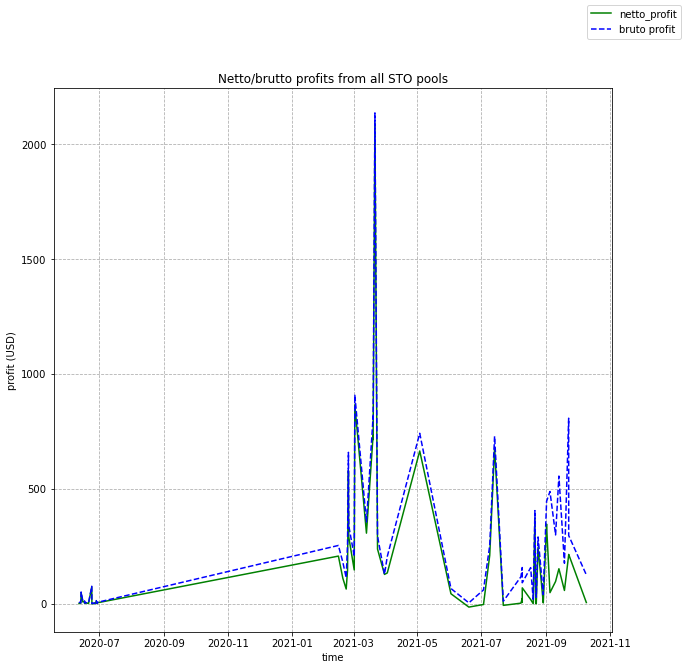

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(timestamp_grouped_sto_profits_df['timestamp'], timestamp_grouped_sto_profits_df['netto_profit'],
        label='netto_profit', color='g')
ax.plot(timestamp_grouped_sto_profits_df['timestamp'], timestamp_grouped_sto_profits_df['bruto_total_profit'],
        color='b', linestyle='--', label='bruto profit')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto/brutto profits from all STO pools')
fig.legend()
plt.show()

In [140]:
print(fr"total sto netto = {sum(timestamp_grouped_sto_profits_df['netto_profit'])}")
print(fr"total sto brutto = {sum(timestamp_grouped_sto_profits_df['bruto_total_profit'])}")
print(fr"total gas spendings in USD = {sum(timestamp_grouped_sto_profits_df['gas_costs_usd'])}")
print("capitalization of MEV attacks conform Uniswap is " + str(sto_profits_df['amount_usd'].sum()) +
      " and out of total sto pools capitalization is " + str(sto_pools_swaps_df['amount_usd'].sum()) +
      ", meaning that capitalization coefficient is " + str(sto_profits_df['netto_profit'].sum() / sto_pools_swaps_df['amount_usd'].sum()))
print("count of MEV transactions on sto pools is " + str(len(sto_profits_df)) +
      " and total sto pools transaction count equal to " + str(len(sto_pools_swaps_df)) +
      ", lead to frequency of MEV attacks to all transactions " + str(len(sto_profits_df) / len(sto_pools_swaps_df)))

total sto netto = 10781.790373439175
total sto brutto = 15099.062519985679
total gas spendings in USD = 4317.272146546503
capitalization of MEV attacks conform Uniswap is 1192742.9229449772 and out of total sto pools capitalization is 145384378.60671276, meaning that capitalization coefficient is 0.00017801673839688495
count of MEV transactions on sto pools is 132 and total sto pools transaction count equal to 12909, lead to frequency of MEV attacks to all transactions 0.01022542412270509
